In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
df = pd.read_csv("deaths-in-india-satp-dfe.csv")
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,...,state_full,subject,svmlabel1,svmlabel1prob,svmlabel2,svmlabel2prob,svmobjecttypelab,svmobjecttypeprob,total_number_of_people_gold,verb
0,711601341,False,finalized,1,4/30/15 8:54,0.0,3.0,1.0,4,1.0,...,Jammu and Kashmir,NaN,security,0.997059,not-assigned,0.991717,person,0.996510,NaN,killed
1,711601342,False,finalized,1,4/30/15 9:41,0.0,7.0,0.0,7,1.0,...,Jammu and Kashmir,NaN,terrorist,0.979219,not-assigned,0.994222,person,0.986274,NaN,killed
2,711601343,False,finalized,1,4/30/15 8:35,0.0,1.0,0.0,1,1.0,...,NaN,NaN,terrorist,0.948564,not-assigned,0.990548,person,0.996909,NaN,arrested
3,711601344,False,finalized,1,4/30/15 9:12,NaN,7.0,NaN,7,1.0,...,Assam,NaN,terrorist,0.999999,not-assigned,1.000000,person,0.991712,NaN,surrendered
4,711601345,False,finalized,1,4/30/15 9:23,0.0,2.0,0.0,2,1.0,...,NaN,NaN,terrorist,0.858030,maoist,0.914427,person,0.987609,NaN,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,712482465,False,finalized,1,05-05-2015 13:45,0.0,4.0,0.0,4,1.0,...,Jharkhand,NaN,terrorist,1.000000,maoist,1.000000,person,0.999880,NaN,arrested
27229,712482476,False,finalized,1,05-05-2015 06:23,0.0,1.0,0.0,1,1.0,...,Bihar,Left-wing extremists < fc > < be > < 8d > < b3...,terrorist,0.996965,maoist,0.999979,person,0.996917,NaN,killed
27230,712482485,False,finalized,1,05-05-2015 13:08,0.0,1.0,0.0,1,1.0,...,Orissa,"the Security Force personnel ,",terrorist,0.998613,maoist,0.999966,person,0.999138,NaN,arrested
27231,712482493,False,finalized,1,05-05-2015 05:48,0.0,1.0,0.0,1,1.0,...,Jammu and Kashmir,NaN,terrorist,0.995912,not-assigned,0.999995,person,0.990061,NaN,killed


In [23]:
df.isna().sum()

_unit_id                                    0
_golden                                     0
_unit_state                                 0
_trusted_judgments                          0
_last_judgment_at                           0
civilians                                2951
militants_terrorists_insurgents          1534
security_forces                          3435
total_number_of_people                      0
accuracy                                    0
canddist                                 5405
civilians_gold                          27233
date                                     8745
districtmatch                               0
eventid                                     0
militants_terrorists_insurgents_gold    27233
object                                      0
objectcleanpp                             344
objectcount                                 0
pid                                         0
report_date                                 0
rid                               

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27233 entries, 0 to 27232
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   _unit_id                              27233 non-null  int64  
 1   _golden                               27233 non-null  bool   
 2   _unit_state                           27233 non-null  object 
 3   _trusted_judgments                    27233 non-null  int64  
 4   _last_judgment_at                     27233 non-null  object 
 5   civilians                             24282 non-null  float64
 6   militants_terrorists_insurgents       25699 non-null  float64
 7   security_forces                       23798 non-null  float64
 8   total_number_of_people                27233 non-null  int64  
 9   accuracy                              27233 non-null  float64
 10  canddist                              21828 non-null  object 
 11  civilians_gold 

In [25]:
import pandas as pd

df['report_date'] = df['report_date'].fillna(method='ffill')

# Step 1: Standardize date formats
df['report_date'] = df['report_date'].str.replace(r'(\d{1,2})/(\d{1,2})/(\d{2})', r'0\1-0\2-20\3')
df['report_date'] = df['report_date'].str.replace(r'(\d{2})/(\d{2})/(\d{4})', r'\1-\2-\3')
df['report_date'] = df['report_date'].str.replace(r'(\d{1,2})/(\d{1,2})/(\d{2})', r'0\1-0\2-20\3')



# Step 2: Convert the text column to a datetime format
df['Date'] = pd.to_datetime(df['report_date'], format='%m-%d-%Y', errors='coerce')

In [26]:
df['Date'] = df['Date'].fillna(method='ffill')


In [27]:
districts = df['districtmatch'].unique()
states = df['state'].unique()
def map_district_to_state(districts, states, df):
    mapping = {}
    for district in districts:
        filtered_data = df['state'][(df['districtmatch'] == district) & df['state'].notnull()]
        if filtered_data.count() != 0:
            mapping[district] = filtered_data.iloc[0]
    return mapping

district_state = map_district_to_state(districts, states, df)

In [28]:
df['state'].fillna(df['districtmatch'].map(district_state), inplace=True)

In [29]:
df.isnull().sum()

_unit_id                                    0
_golden                                     0
_unit_state                                 0
_trusted_judgments                          0
_last_judgment_at                           0
civilians                                2951
militants_terrorists_insurgents          1534
security_forces                          3435
total_number_of_people                      0
accuracy                                    0
canddist                                 5405
civilians_gold                          27233
date                                     8745
districtmatch                               0
eventid                                     0
militants_terrorists_insurgents_gold    27233
object                                      0
objectcleanpp                             344
objectcount                                 0
pid                                         0
report_date                                 0
rid                               

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27233 entries, 0 to 27232
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   _unit_id                              27233 non-null  int64         
 1   _golden                               27233 non-null  bool          
 2   _unit_state                           27233 non-null  object        
 3   _trusted_judgments                    27233 non-null  int64         
 4   _last_judgment_at                     27233 non-null  object        
 5   civilians                             24282 non-null  float64       
 6   militants_terrorists_insurgents       25699 non-null  float64       
 7   security_forces                       23798 non-null  float64       
 8   total_number_of_people                27233 non-null  int64         
 9   accuracy                              27233 non-null  float64       
 10

In [31]:
df['sentence'] = df['sentence'].str.replace('[^\w\s]','').str.lower()

#### Dropping all the columns with all null values and those columns which is having only 1 unique values

In [32]:
#Dropping all the columns with all null values and those columns which is having only 1 unique values
# Also dropping last judgments at bcz it is not valid

df.dropna(axis=1, how='all', inplace=True)
print(df['_golden'].unique())
print(df['_trusted_judgments'].unique())
print(df['_unit_state'].unique())
df.drop(['_golden','_trusted_judgments','_unit_state','_last_judgment_at'],axis=1,inplace=True)

[False]
[1]
['finalized']


### Canddist and districtmatch are same columns having same values the only difference is canddist contains many null values

In [33]:
df[(df['civilians'].isnull()) & (df['security_forces'].isnull()) & (df['militants_terrorists_insurgents'].isnull())].shape


(56, 30)

In [34]:
df[(df['civilians'].isnull()) & (df['security_forces'].isnull()) & (df['militants_terrorists_insurgents']!=df['total_number_of_people'])].count()

_unit_id                           60
civilians                           0
militants_terrorists_insurgents     4
security_forces                     0
total_number_of_people             60
accuracy                           60
canddist                           41
date                               27
districtmatch                      60
eventid                            60
object                             60
objectcleanpp                      57
objectcount                        60
pid                                60
report_date                        60
rid                                60
sentence                           60
sid                                60
srid                               60
state                              60
state_full                         44
subject                            18
svmlabel1                          60
svmlabel1prob                      60
svmlabel2                          60
svmlabel2prob                      60
svmobjecttyp

In [35]:
#Dropped all the  rows which is  having null values in civilians,militants_terrorists_insurgents, security_forces, total_number_of_people columns,.

df2 = df.drop(df[(df['civilians'].isnull()) & (df['security_forces'].isnull()) & (df['militants_terrorists_insurgents']!=df['total_number_of_people'])].index)

In [36]:
df2['canddist'].fillna(df2['districtmatch'],inplace=True)

In [37]:
#dropped the date columnn as it does not contain any meaningful data and is ambigious)
df2.drop('date',axis=1,inplace=True)

In [38]:
df2['civilians'].fillna(0,inplace=True)
df2['militants_terrorists_insurgents'].fillna(0,inplace=True)
df2['security_forces'].fillna(0,inplace=True)

In [39]:
df2.isnull().sum()

_unit_id                               0
civilians                              0
militants_terrorists_insurgents        0
security_forces                        0
total_number_of_people                 0
accuracy                               0
canddist                               0
districtmatch                          0
eventid                                0
object                                 0
objectcleanpp                        341
objectcount                            0
pid                                    0
report_date                            0
rid                                    0
sentence                               0
sid                                    0
srid                                   0
state                                170
state_full                          5749
subject                            14015
svmlabel1                              0
svmlabel1prob                          0
svmlabel2                              0
svmlabel2prob   

In [40]:
df2['objectcleanpp'].fillna(df2['object'],inplace=True)
df2.isnull().sum()

_unit_id                               0
civilians                              0
militants_terrorists_insurgents        0
security_forces                        0
total_number_of_people                 0
accuracy                               0
canddist                               0
districtmatch                          0
eventid                                0
object                                 0
objectcleanpp                          0
objectcount                            0
pid                                    0
report_date                            0
rid                                    0
sentence                               0
sid                                    0
srid                                   0
state                                170
state_full                          5749
subject                            14015
svmlabel1                              0
svmlabel1prob                          0
svmlabel2                              0
svmlabel2prob   

In [41]:
statefull_name = df['state_full'].unique()
states = df['state'].unique()
def map_district_to_state(states, statefull_name, df2):
    mapping = {}
    for state in states:
        filtered_data = df['state_full'][(df['state'] == state) & df['state_full'].notnull()]
        if filtered_data.count() != 0:
            mapping[state] = filtered_data.iloc[0]
    return mapping

state_statefull = map_district_to_state(states,statefull_name, df2)
df2['state_full'].fillna(df['state'].map(state_statefull), inplace=True)

## Making different verbs into its synonym 

In [42]:
def convert_to_arrest(df):
    return df.verb.map(lambda x: "arrested" if x in ["arrest", "arresting"] else x)

def convert_to_injure(df):
    return df.verb.map(lambda x: "injured" if x in ["injure", "injuring", "wounded", "wounding"] else x)

def convert_to_kill(df):
    return df.verb.map(lambda x: "killed" if x in ["kill", "kills", "killing"] else x)

def convert_to_surrender(df):
    return df.verb.map(lambda x: "surrendered" if x in ["surrender", "surrendering"] else x)

df2['verb'] = convert_to_arrest(df2)
df2['verb'] = convert_to_injure(df2)
df2['verb'] = convert_to_kill(df2)
df2['verb'] = convert_to_surrender(df2)

## Making similar svmlabel into its synonym

In [43]:
df2['svmlabel1'].value_counts()

svmlabel1
terrorist    13760
civilian      9726
security      3557
public          76
private         54
Name: count, dtype: int64

In [44]:
# Public is synonym with civilian and private is synonym with security. Moreover the count of private and public is very low....we can make convert them into their synonym

def convert_to_civilian(df):
    return df.svmlabel1.map(lambda x: "civilian" if x == 'public' else x)

def convert_to_security(df):
    return df.svmlabel1.map(lambda x: "security" if x == 'private' else x)

df2['svmlabel1'] = convert_to_civilian(df2)
df2['svmlabel1'] = convert_to_security(df2)

## Some States are given different initials with same fullstatename

In [45]:
df2.state.unique()

array(['JK', 'WB', 'AS', 'AP', 'MN', 'BR|JH', 'MH', 'TR', 'PB', 'CT|MP',
       'TN', 'UP', 'NL', nan, 'GJ', 'ML', 'MZ', 'OR', 'KA', 'JH', 'CT',
       'RJ', 'AS|MN', 'AR', 'KL'], dtype=object)

In [46]:
## For CT|MP the statefull is Madhya Pradesh only so changing CT|MP to MP
## For AS|MN the statefull is Assam only so changing AS|MN to AS
## For BR|JH the statefull is Jharkhand only so changing BR|JH to JH

def convertTo_JH(df):
    return df.state.map(lambda x:'JH' if x == 'BR|JH' else x)
    
def convertTo_AS(df):
    return df.state.map(lambda x:'AS' if x == 'AS|MN' else x)

def convertTo_MP(df):
    return df.state.map(lambda x:'MP' if x == 'CT|MP' else x)

df2['state'] = convertTo_JH(df2)
df2['state'] = convertTo_AS(df2)
df2['state'] = convertTo_MP(df2)

## For JK district

In [47]:

def convertTo_baramulla(df):
    return df.districtmatch.map(lambda x:'baramulla' if x in ['baramullah', 'baramula','baramulla'] else x)

df2['districtmatch'] = convertTo_baramulla(df2)

In [48]:
# df2.districtmatch.unique()

### Total people above 397 were either money or time with very few exceptions.

In [49]:
df2 = df2[df2['total_number_of_people'] <397]

## All three values are zero

In [50]:
df2[(df2['civilians'] == 0) & (df2['security_forces'] == 0) & (df2['militants_terrorists_insurgents'] == 0) & (df2['total_number_of_people'] == 0)].shape

(393, 29)

#### Dropping these rows

In [51]:
condition = (df2['civilians'] != 0) | (df2['security_forces'] != 0) | (df2['militants_terrorists_insurgents'] != 0) | (df2['total_number_of_people'] != 0)

filtered_df2 = df2[condition]

### Dropping those rows where sum of civilians,terrorists and security forces is not equal to total people affected

In [52]:
filtered_df2 = filtered_df2[filtered_df2.iloc[:, 1:4].sum(axis=1) == filtered_df2.iloc[:, 4]]

## cleaning svmlabel2

In [53]:
filtered_df2.svmlabel2.value_counts()

svmlabel2
not-assigned    22942
maoist           2883
Name: count, dtype: int64

In [54]:
def non_maoist(df):
    return df.svmlabel2.map(lambda x:'not maoist' if x == 'not-assigned' else x)

filtered_df2['svmlabel2'] = non_maoist(filtered_df2)

## Saving CSV to use in POWER BI

In [55]:
filtered_df2.to_csv('my_data.csv', index=False)

In [57]:
filtered_df2['svmobjecttypelab'].unique()

array(['person', 'asset/ infrastructure'], dtype=object)

## Anova test on total people and verb
### Null Hypotheseis : The average number of total people akilled,injured,arrested,surrendered is equal

#### More than 99% confidence -- Passed

In [114]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

new = ols('total_number_of_people ~ verb',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)

In [115]:
an

,sum_sq,df,F,PR(>F)
verb,3.128327e+04,3.0,69.769228,6.241522e-45
Residual,3.859225e+06,25821.0,NaN,NaN


## Anova test on total people and district
### Null Hypotheseis : The average number of total people affected in each district is equal

#### More than 99% confidence --- passed

In [116]:
new = ols('total_number_of_people ~ districtmatch',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
districtmatch,2.460568e+05,543.0,3.143385,8.315523e-115
Residual,3.644451e+06,25281.0,NaN,NaN


## Anova test on total people and state
### Null Hypotheseis : The average number of total people affected in each state is equal

#### More than 99% confidence -- Passed

In [117]:
new = ols('total_number_of_people ~ state',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
state,4.060034e+04,21.0,12.904841,4.469385e-45
Residual,3.841878e+06,25644.0,NaN,NaN


## Performing chi-square test on verb and state
### Null Hypothesis : There is no significant relationship between both variabes
#### More than 99% confidence --- passed

In [118]:
test = filtered_df2.loc[:,['verb','state']]
test.state.isnull().sum()

159

In [119]:
## Removing rows with nan values for the testing purpose
test = test.dropna()

In [120]:
contingency_table = pd.crosstab(test['state'], test['verb'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 6481.525231529815
p-value: 0.0


## Chi-Square test on svmlabel1 and verb
### Null Hypothesis : There is no significant relationship between both variabes
#### More than 99% confidence --- passed

In [121]:
test = filtered_df2.loc[:,['verb','svmlabel1']]
test.isnull().sum()

verb         0
svmlabel1    0
dtype: int64

In [122]:
contingency_table = pd.crosstab(test['svmlabel1'], test['verb'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 5135.032533464751
p-value: 0.0


## Chi-sqaure test on svmlabel1 and svmlabel2
### Null Hypothesis : There is no significant relationship between both variabes
#### More than 99% confidence ---- Passed

In [123]:
contingency_table = pd.crosstab(filtered_df2['svmlabel1'], filtered_df2['svmlabel2'])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 2287.307180706526
p-value: 0.0


## Chi-square test on svmlabel2 and state
### Null Hypothesis : There is no significant relationship between both variabes
#### More than 99% confidence ---- Passed

In [124]:
contingency_table = pd.crosstab(filtered_df2['state'], filtered_df2['svmlabel2'])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 9294.24278318553
p-value: 0.0


## Chi-square test on svmlabel2 and verb
### Null Hypothesis : There is no significant relationship between both variabes
#### More than 99% confidence -- Passed

In [125]:
contingency_table = pd.crosstab(filtered_df2['verb'], filtered_df2['svmlabel2'])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 988.7511236379621
p-value: 4.958423779509476e-214


## Anova test on civilian and
### Null Hypothesis :  there is no significant difference between the means of the different categories being compared in a column
#### 1. State : More than 99% confidence --- Passed  (mean of civilians affected in all the state is equal)
#### 2. District: More than 99% confidence --- Passed (mean of civilians affected in all the district is equal)
#### 3. verb: More than 99% confidence --- Passed (mean of civilians killed, injured, arrested, surrendered is equal)

In [126]:
new = ols('civilians ~ state',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
state,3.876174e+04,21.0,22.017113,6.975802e-84
Residual,2.149856e+06,25644.0,NaN,NaN


In [127]:
new = ols('civilians ~ districtmatch',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
districtmatch,1.601108e+05,543.0,3.664952,2.463106e-155
Residual,2.033980e+06,25281.0,NaN,NaN


In [128]:
new = ols('civilians ~ verb',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
verb,3.176529e+04,3.0,126.43974,2.633017e-81
Residual,2.162325e+06,25821.0,NaN,NaN


## Anova test on militants_terrorists_insurgents and
### Null Hypothesis :  there is no significant difference between the means of the different categories being compared in a column
#### 1. State : More than 99% confidence --- Passed  (mean of terrorists affected in all the state is equal)
#### 2. District: More than 98% confidence --- Passed (mean of terrorists affected in all the district is equal)
#### 3. verb: More than 99% confidence --- Passed (mean of terrorists killed, injured, arrested, surrendered is equal)

In [129]:
new = ols('militants_terrorists_insurgents ~ state',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an


,sum_sq,df,F,PR(>F)
state,2.853309e+03,21.0,2.026388,0.003602
Residual,1.719463e+06,25644.0,NaN,NaN


In [130]:
new = ols('militants_terrorists_insurgents ~ districtmatch',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an


,sum_sq,df,F,PR(>F)
districtmatch,4.001131e+04,543.0,1.105036,0.047059
Residual,1.685780e+06,25281.0,NaN,NaN


In [131]:
new = ols('militants_terrorists_insurgents ~ verb',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
verb,3.630162e+04,3.0,184.93631,1.177669e-118
Residual,1.689490e+06,25821.0,NaN,NaN


## Anova test on security_forces and
### Null Hypothesis :  there is no significant difference between the means of the different categories being compared in a column
#### 1. State : More than 99% confidence --- Passed  (mean of security forces affected in all the state is equal)
#### 2. District: More than 99% confidence --- Passed (mean of security forces affected in all the district is equal)
#### 3. verb: More than 99% confidence --- Passed (mean of security forces killed, injured, arrested, surrendered is equal)

In [132]:
new = ols('security_forces ~ state',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
state,2505.876202,21.0,26.535791,2.464460e-103
Residual,115317.189332,25644.0,NaN,NaN


In [133]:
new = ols('security_forces ~ districtmatch',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
districtmatch,8771.291926,543.0,3.742527,1.565259e-161
Residual,109117.162827,25281.0,NaN,NaN


In [134]:
new = ols('security_forces ~ verb',data=filtered_df2).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
verb,4574.187039,3.0,347.441047,3.267100e-221
Residual,113314.267714,25821.0,NaN,NaN


## Word cloud

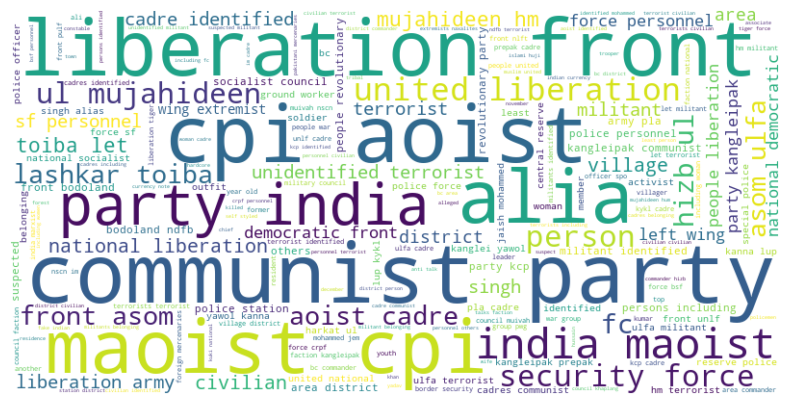

In [135]:
from wordcloud import WordCloud

text = ' '.join(filtered_df2['objectcleanpp'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


In [136]:
'''For object -- not so good '''

# from wordcloud import WordCloud, STOPWORDS

# text = ' '.join(filtered_df2['object'])

# all_stopwords = set(STOPWORDS)

# wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords).generate(text)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='gaussian')
# plt.axis('off')  
# plt.show()


'For object -- not so good '

## Some visulaizations

In [137]:
# grouped_df = filtered_df2.groupby('state')['total_number_of_people'].sum().reset_index()

# # Sort the data by 'total_number_of_people' in descending order
# sorted_df = grouped_df.sort_values('total_number_of_people', ascending=False)

# # Set the figure size and style
# plt.figure(figsize=(12, 8))
# sns.set(style='whitegrid', font_scale=1.2)

# # Plot the bar graph using seaborn with the 'viridis' color palette
# sns.barplot(data=sorted_df, x='state', y='total_number_of_people', palette='colorblind')

# # Set the labels and title
# plt.xlabel('State')
# plt.ylabel('Total Number of People')
# plt.title('Total Number of People by State')

# plt.tight_layout()
# plt.show()

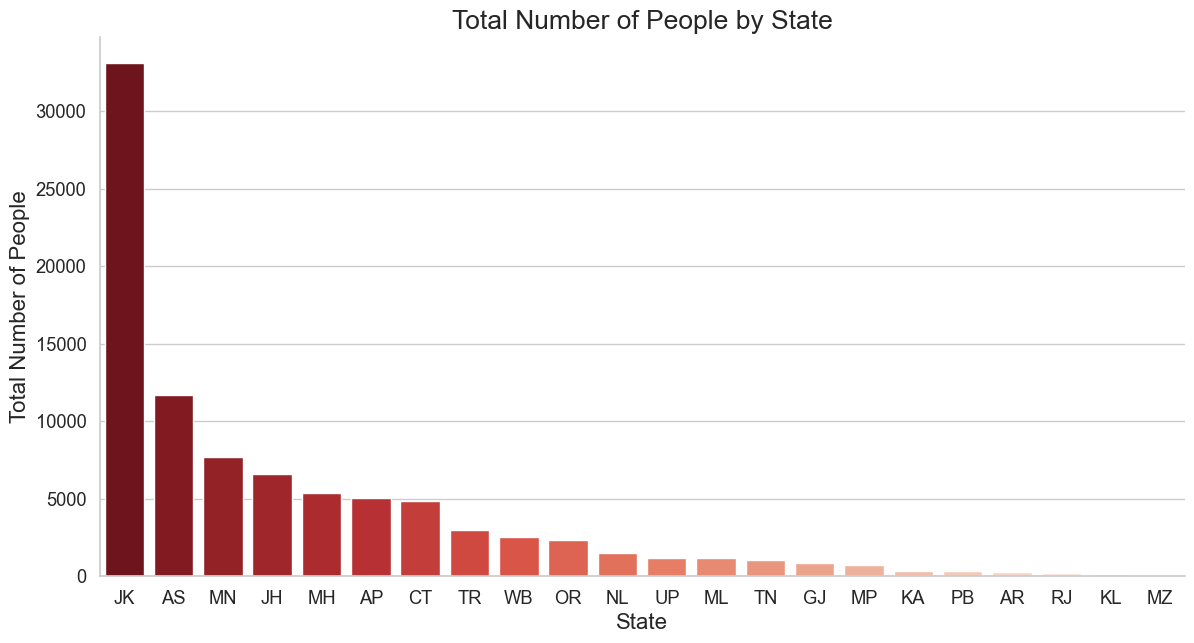

In [138]:
grouped_df = filtered_df2.groupby('state')['total_number_of_people'].sum().reset_index()
sorted_df = grouped_df.sort_values('total_number_of_people', ascending=False)

# custom_palette = sns.color_palette("Blues_r", n_colors=len(sorted_df))
custom_palette = sns.color_palette("Reds_r", n_colors=len(sorted_df))


plt.figure(figsize=(14, 7))
sns.barplot(data=sorted_df, x='state', y='total_number_of_people', palette=custom_palette)
plt.xlabel('State',fontsize=16)
plt.ylabel('Total Number of People',fontsize=16)
plt.title('Total Number of People by State',fontsize=19)

sns.despine()
plt.show()


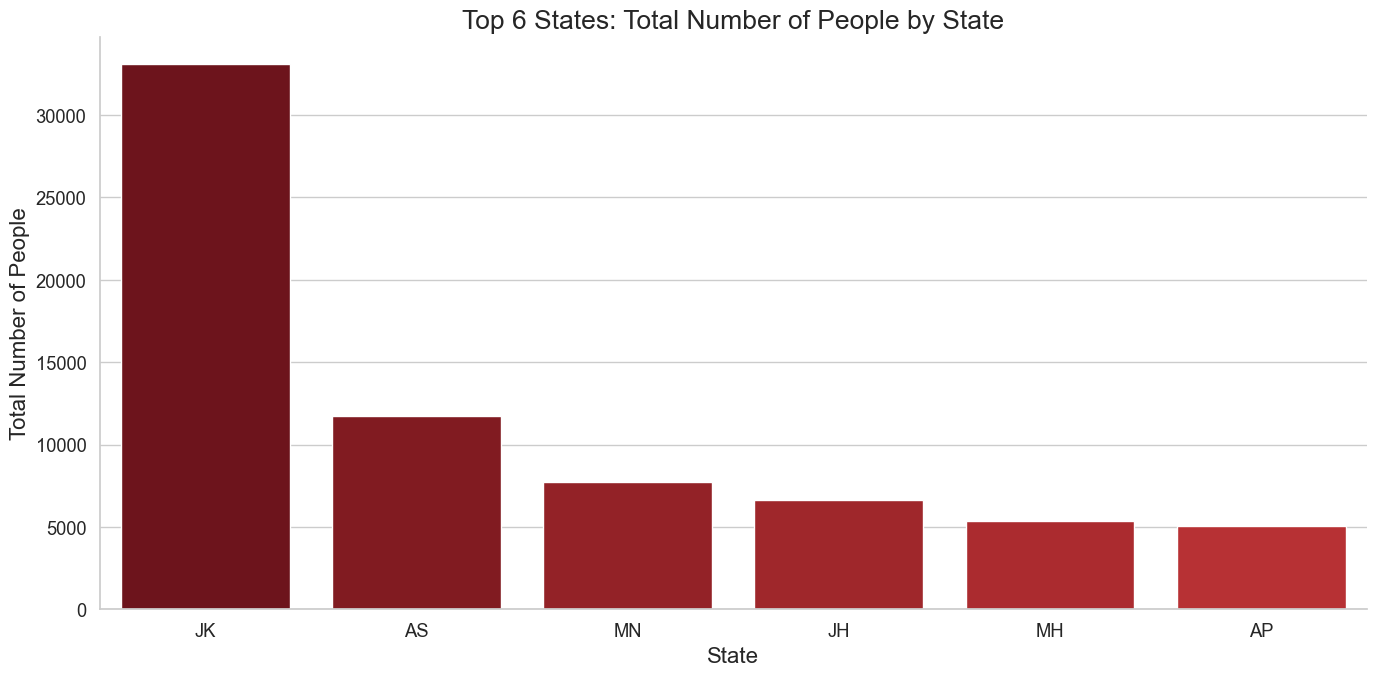

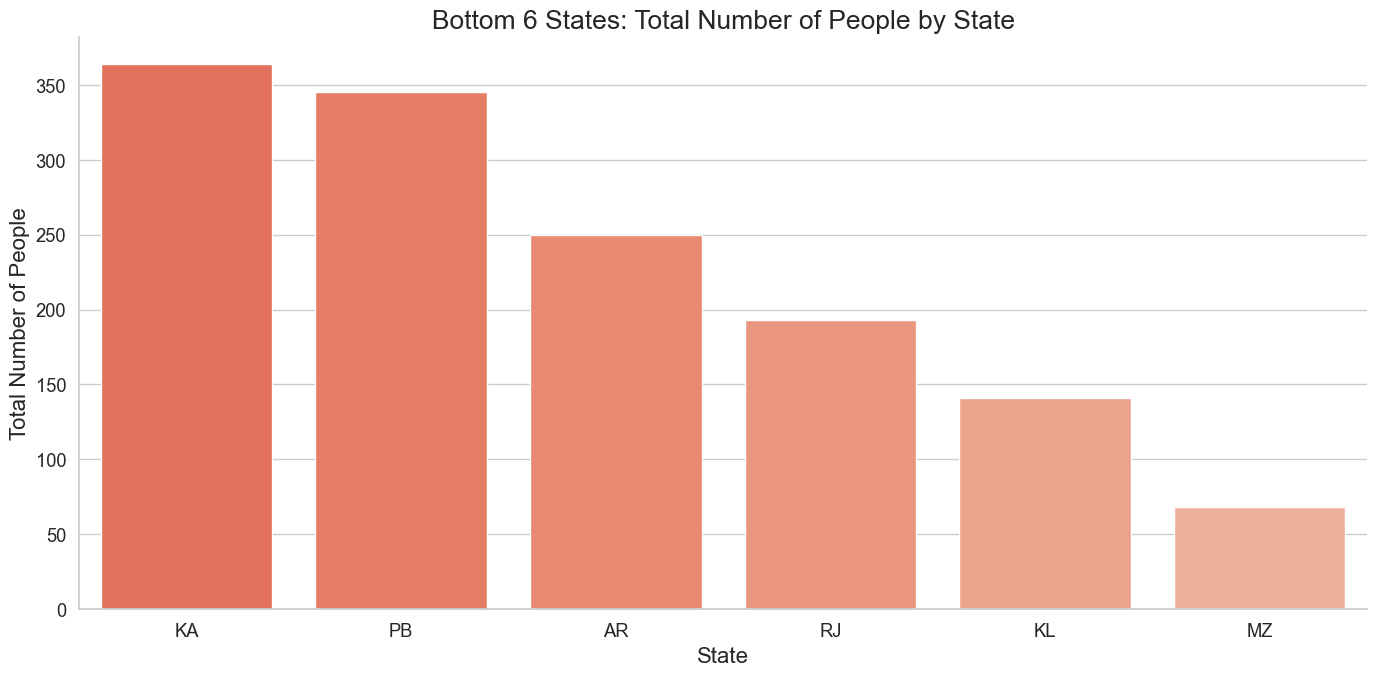

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = filtered_df2.groupby('state')['total_number_of_people'].sum().reset_index()
sorted_df = grouped_df.sort_values('total_number_of_people', ascending=False)

# custom_palette = sns.color_palette("Blues_r", n_colors=len(sorted_df))
custom_palette = sns.color_palette("Reds_r", n_colors=len(sorted_df))

plt.figure(figsize=(12, 6))

# Plot the top 6 states
top_6_states = sorted_df.head(6)
ax1 = sns.barplot(data=top_6_states, x='state', y='total_number_of_people', palette=custom_palette[:6])
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of People', fontsize=16)
plt.title('Top 6 States: Total Number of People by State', fontsize=19)

sns.despine()

plt.tight_layout()
plt.show()

# Plot the bottom 6 states
bottom_6_states = sorted_df.tail(6)
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=bottom_6_states, x='state', y='total_number_of_people', palette=custom_palette[-12:-6])
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of People', fontsize=16)
plt.title('Bottom 6 States: Total Number of People by State', fontsize=19)

sns.despine()

plt.tight_layout()
plt.show()


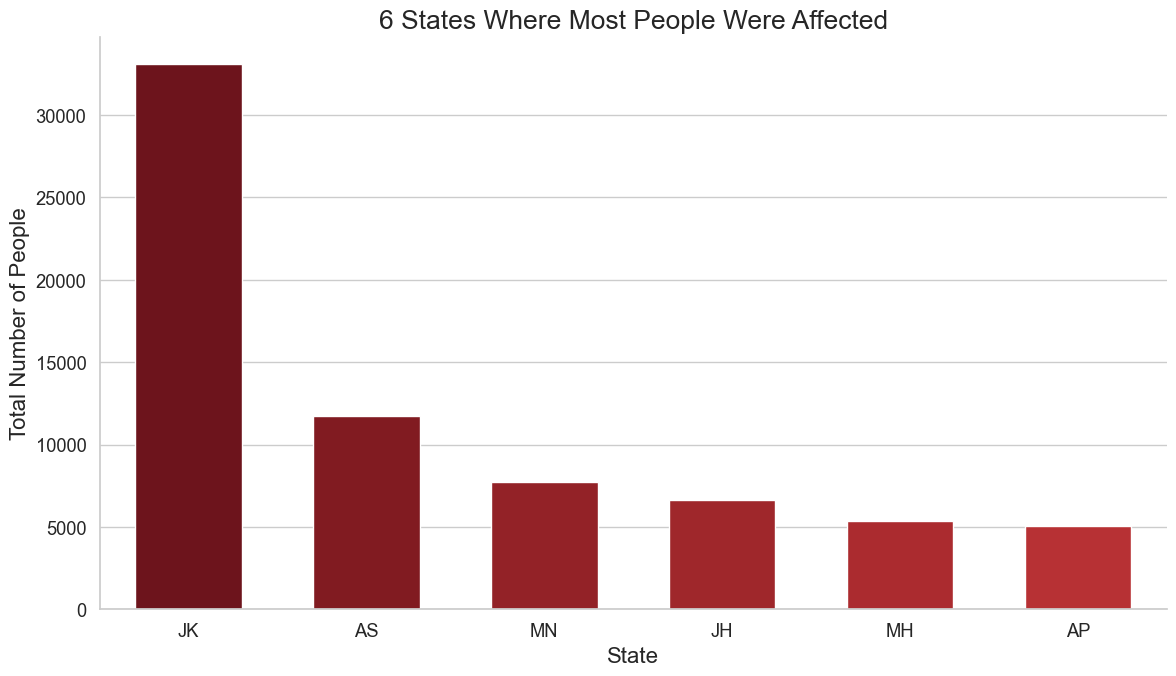

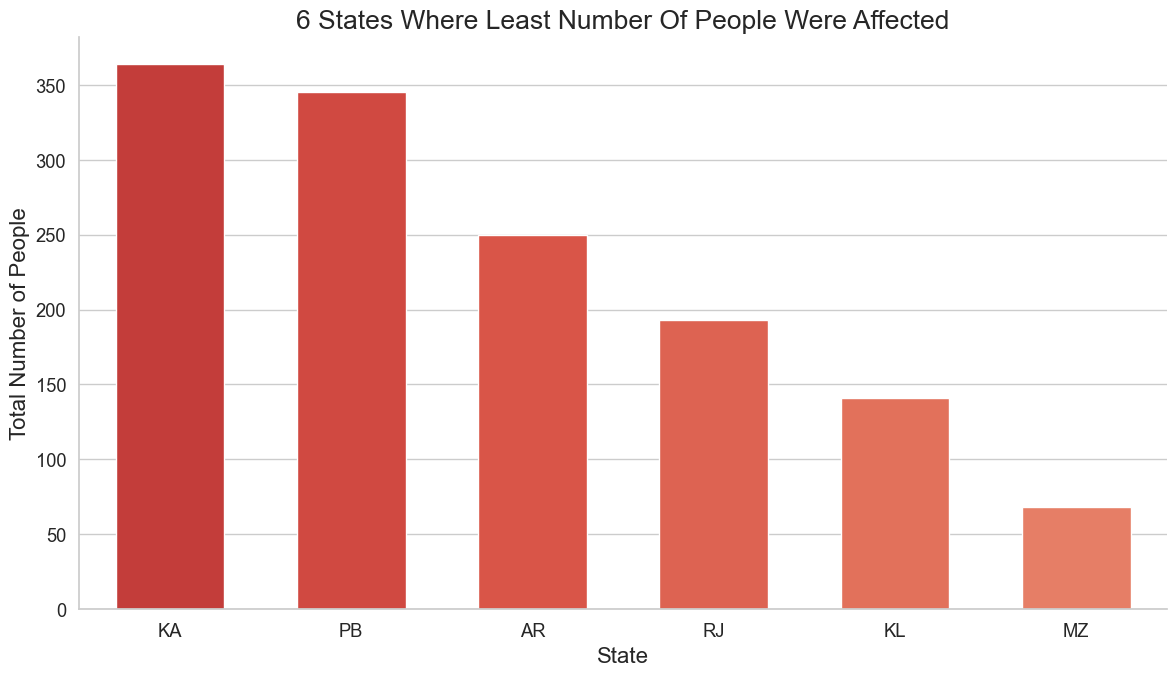

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = filtered_df2.groupby('state')['total_number_of_people'].sum().reset_index()
sorted_df = grouped_df.sort_values('total_number_of_people', ascending=False)

# custom_palette = sns.color_palette("Blues_r", n_colors=len(sorted_df))
custom_palette = sns.color_palette("Reds_r", n_colors=len(sorted_df))

plt.figure(figsize=(12, 7))

# Plot the top 6 states
top_6_states = sorted_df.head(6)
ax1 = sns.barplot(data=top_6_states, x='state', y='total_number_of_people', palette=custom_palette[:6], width=0.6)  # Adjust the width here
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of People', fontsize=16)
plt.title('6 States Where Most People Were Affected', fontsize=19)

sns.despine()

plt.tight_layout()
plt.show()

# Plot the bottom 6 states
bottom_6_states = sorted_df.tail(6)
plt.figure(figsize=(12, 7))
ax2 = sns.barplot(data=bottom_6_states, x='state', y='total_number_of_people', palette=custom_palette[-16:-10], width=0.6)  # Adjust the width here
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of People', fontsize=16)
plt.title('6 States Where Least Number Of People Were Affected', fontsize=19)

sns.despine()

plt.tight_layout()
plt.show()


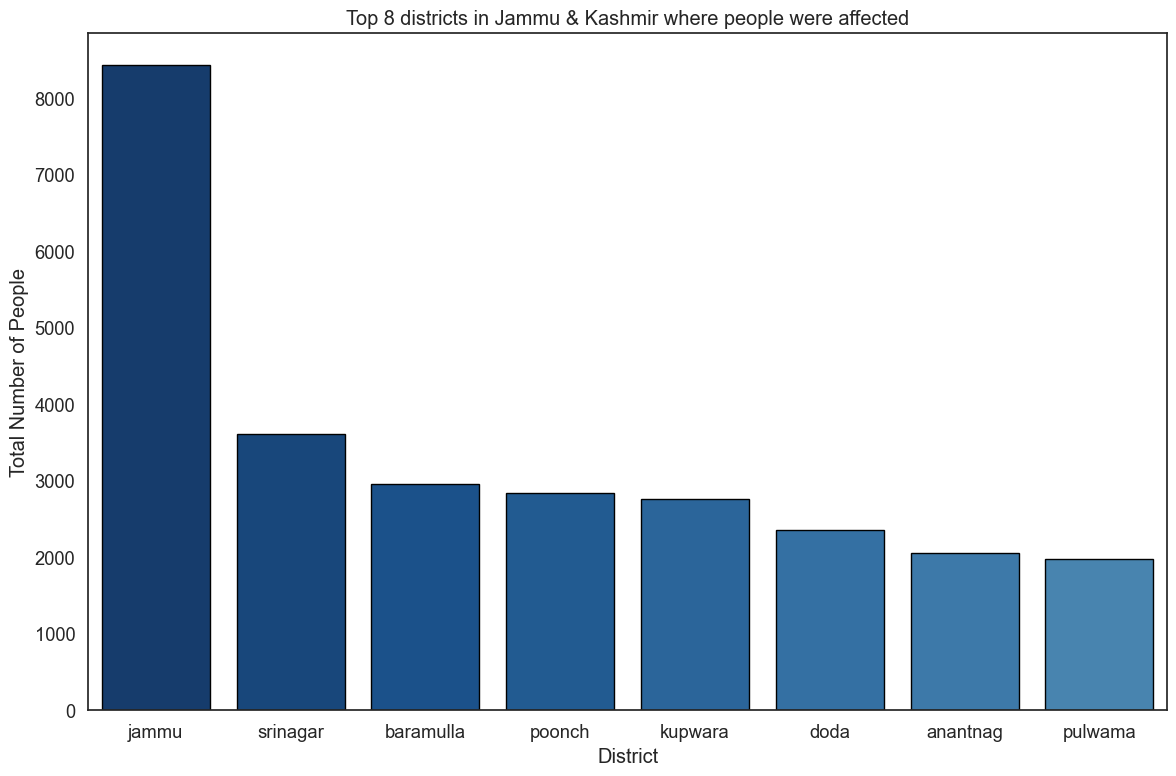

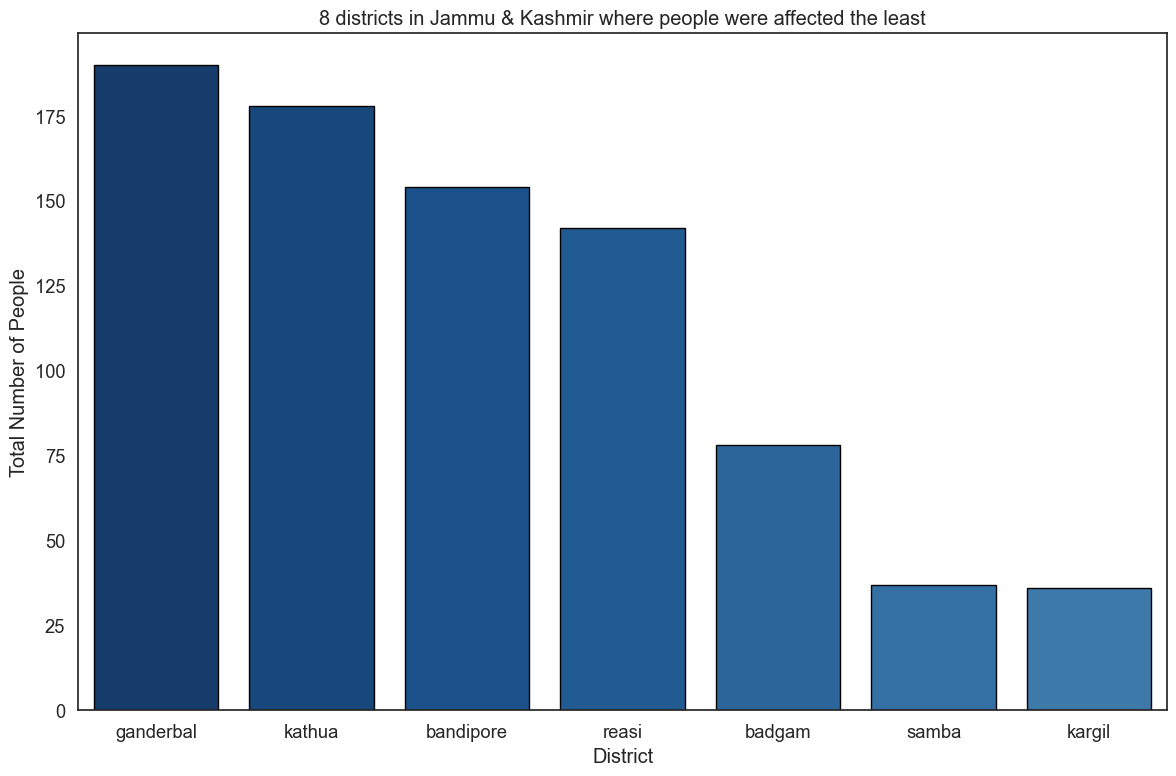

In [141]:
jk_df = filtered_df2[filtered_df2['state'] == 'JK']
grouped_jk_df = jk_df.groupby('districtmatch')['total_number_of_people'].sum().reset_index()

sorted_jk_df = grouped_jk_df.sort_values(by='total_number_of_people', ascending=False)

custom_palette = sns.color_palette("Blues_r", n_colors=len(sorted_jk_df))

plt.figure(figsize=(12, 8))
sns.set(style='white', font_scale=1.2)

top_12_states = sorted_jk_df.head(8)

ax1 = sns.barplot(data=top_12_states, x='districtmatch', y='total_number_of_people', palette=custom_palette,edgecolor='black')

ax1.set_xlabel('District')
ax1.set_ylabel('Total Number of People')
ax1.set_title('Top 8 districts in Jammu & Kashmir where people were affected')

plt.xticks(rotation=0)

# sns.despine()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.set(style='white', font_scale=1.2)

rest_of_states = sorted_jk_df.iloc[16:]

ax2 = sns.barplot(data=rest_of_states, x='districtmatch', y='total_number_of_people', palette=custom_palette,edgecolor='black')

ax2.set_xlabel('District')
ax2.set_ylabel('Total Number of People')
ax2.set_title('8 districts in Jammu & Kashmir where people were affected the least')

plt.xticks(rotation=0)

# sns.despine()

plt.tight_layout()
plt.show()


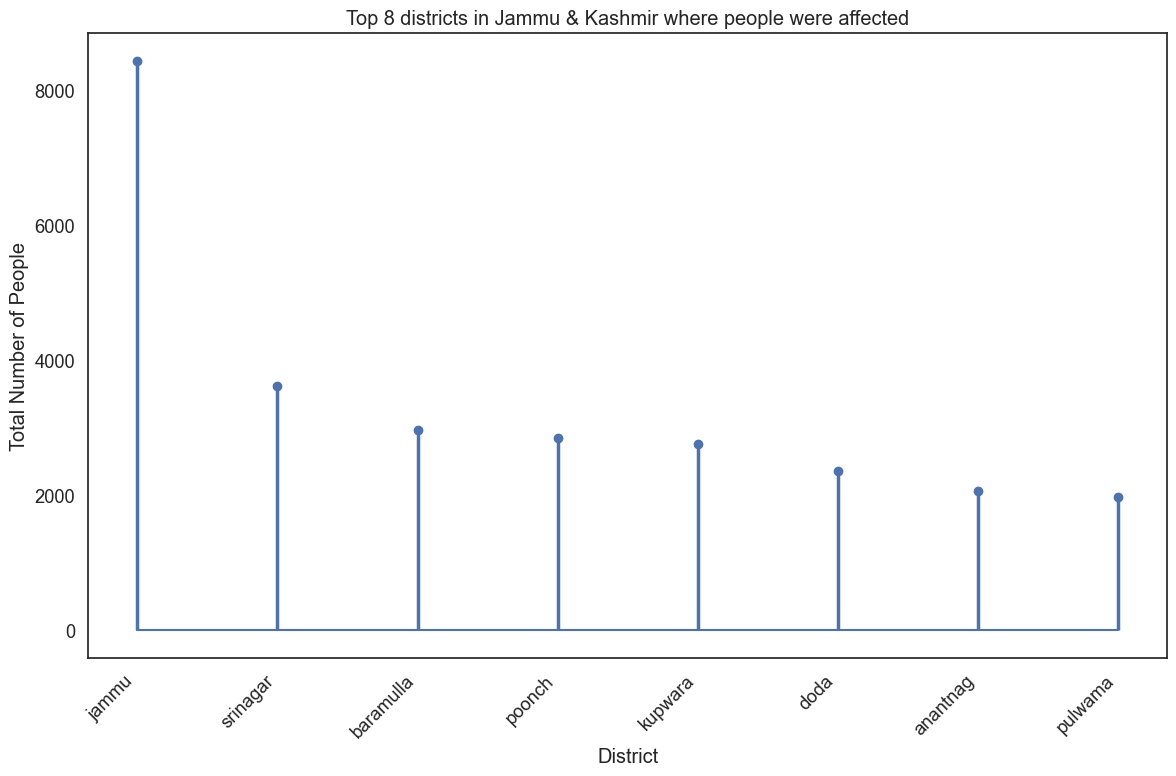

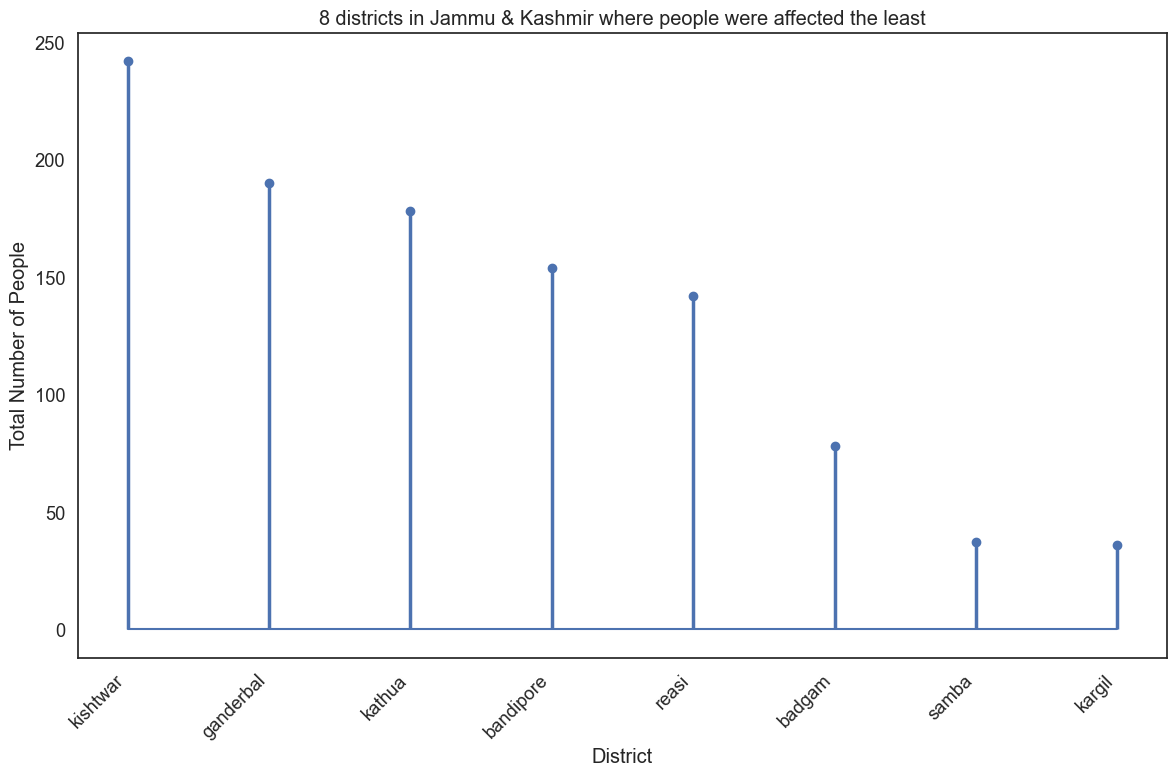

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

jk_df = filtered_df2[filtered_df2['state'] == 'JK']
grouped_jk_df = jk_df.groupby('districtmatch')['total_number_of_people'].sum().reset_index()

sorted_jk_df = grouped_jk_df.sort_values(by='total_number_of_people', ascending=False)

custom_palette = sns.color_palette("Blues_r", n_colors=len(sorted_jk_df))

plt.figure(figsize=(12, 8))
sns.set(style='white', font_scale=1.2)

top_8_states = sorted_jk_df.head(8)

# Create evenly spaced indices for lollipop plot
x_indices_top = np.linspace(0, len(top_8_states)-1, len(top_8_states))

ax1 = plt.stem(x_indices_top, top_8_states['total_number_of_people'], linefmt='C0-', markerfmt='C0o', basefmt='C0-')
plt.setp(ax1.stemlines, linewidth=2.5)  # Increase the stem width
plt.xlabel('District')
plt.ylabel('Total Number of People')
plt.title('Top 8 districts in Jammu & Kashmir where people were affected')
plt.xticks(x_indices_top, top_8_states['districtmatch'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.set(style='white', font_scale=1.2)

least_8_states = sorted_jk_df.iloc[-8:]

# Create evenly spaced indices for lollipop plot
x_indices_least = np.linspace(0, len(least_8_states)-1, len(least_8_states))

ax2 = plt.stem(x_indices_least, least_8_states['total_number_of_people'], linefmt='C0-', markerfmt='C0o', basefmt='C0-')
plt.setp(ax2.stemlines, linewidth=2.5)  # Increase the stem width
plt.xlabel('District')
plt.ylabel('Total Number of People')
plt.title('8 districts in Jammu & Kashmir where people were affected the least')
plt.xticks(x_indices_least, least_8_states['districtmatch'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


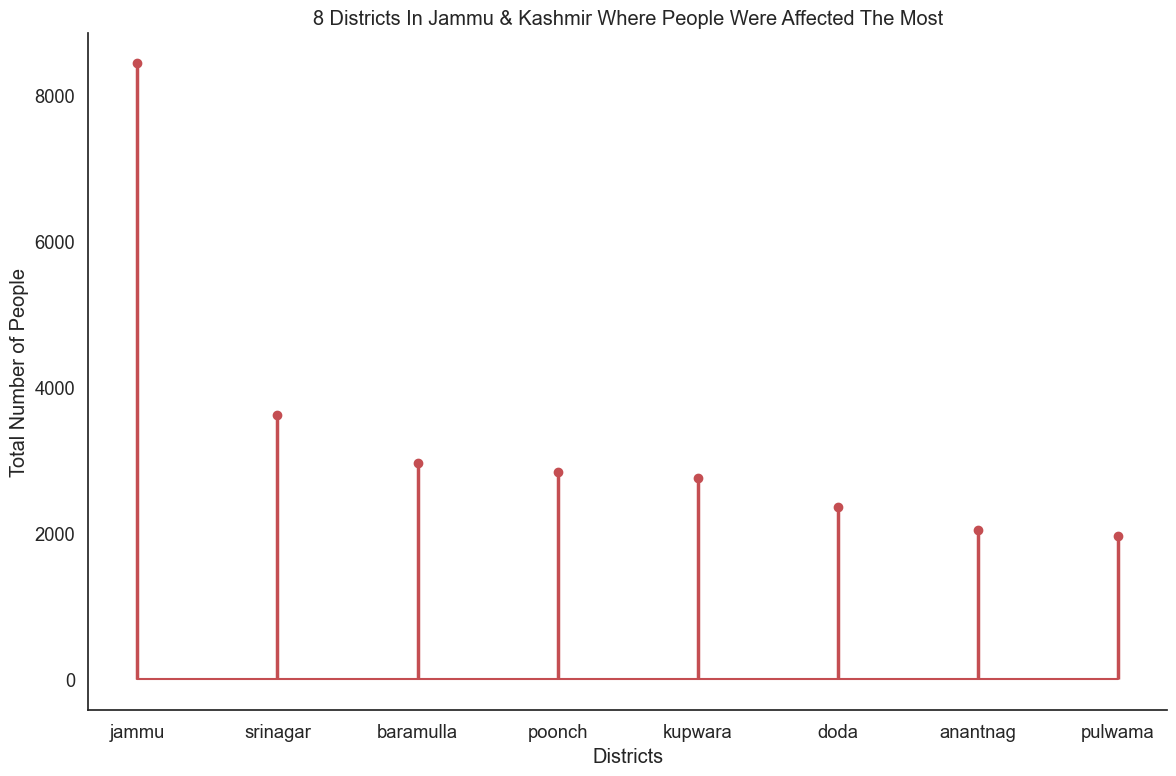

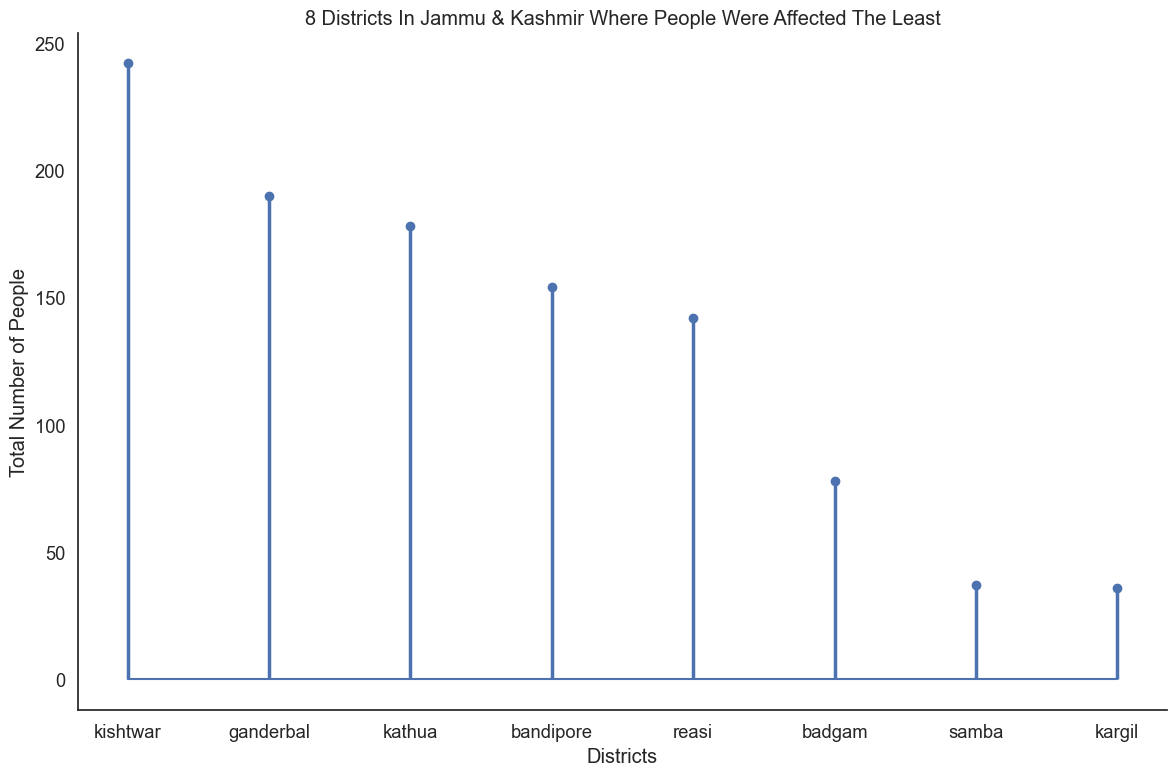

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

jk_df = filtered_df2[filtered_df2['state'] == 'JK']
grouped_jk_df = jk_df.groupby('districtmatch')['total_number_of_people'].sum().reset_index()

sorted_jk_df = grouped_jk_df.sort_values(by='total_number_of_people', ascending=False)

custom_palette = sns.color_palette("Blues_r", n_colors=len(sorted_jk_df))

plt.figure(figsize=(12, 8))
sns.set(style='white', font_scale=1.2)

top_8_states = sorted_jk_df.head(8)

# Create evenly spaced indices for lollipop plot
x_indices_top = np.linspace(0, len(top_8_states)-1, len(top_8_states))

ax1 = plt.stem(x_indices_top, top_8_states['total_number_of_people'], linefmt='r-', markerfmt='ro', basefmt='r-')
plt.setp(ax1.stemlines, linewidth=2.5)  # Increase the stem width
plt.xlabel('Districts')
plt.ylabel('Total Number of People')
plt.title('8 Districts In Jammu & Kashmir Where People Were Affected The Most')
plt.xticks(x_indices_top, top_8_states['districtmatch'])

sns.despine()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.set(style='white', font_scale=1.2)

least_8_states = sorted_jk_df.iloc[-8:]

# Create evenly spaced indices for lollipop plot
x_indices_least = np.linspace(0, len(least_8_states)-1, len(least_8_states))

ax2 = plt.stem(x_indices_least, least_8_states['total_number_of_people'], linefmt='b-', markerfmt='bo', basefmt='b-')
plt.setp(ax2.stemlines, linewidth=2.5)  # Increase the stem width
plt.xlabel('Districts')
plt.ylabel('Total Number of People')
plt.title('8 Districts In Jammu & Kashmir Where People Were Affected The Least')
plt.xticks(x_indices_least, least_8_states['districtmatch'])

sns.despine()
plt.tight_layout()
plt.show()


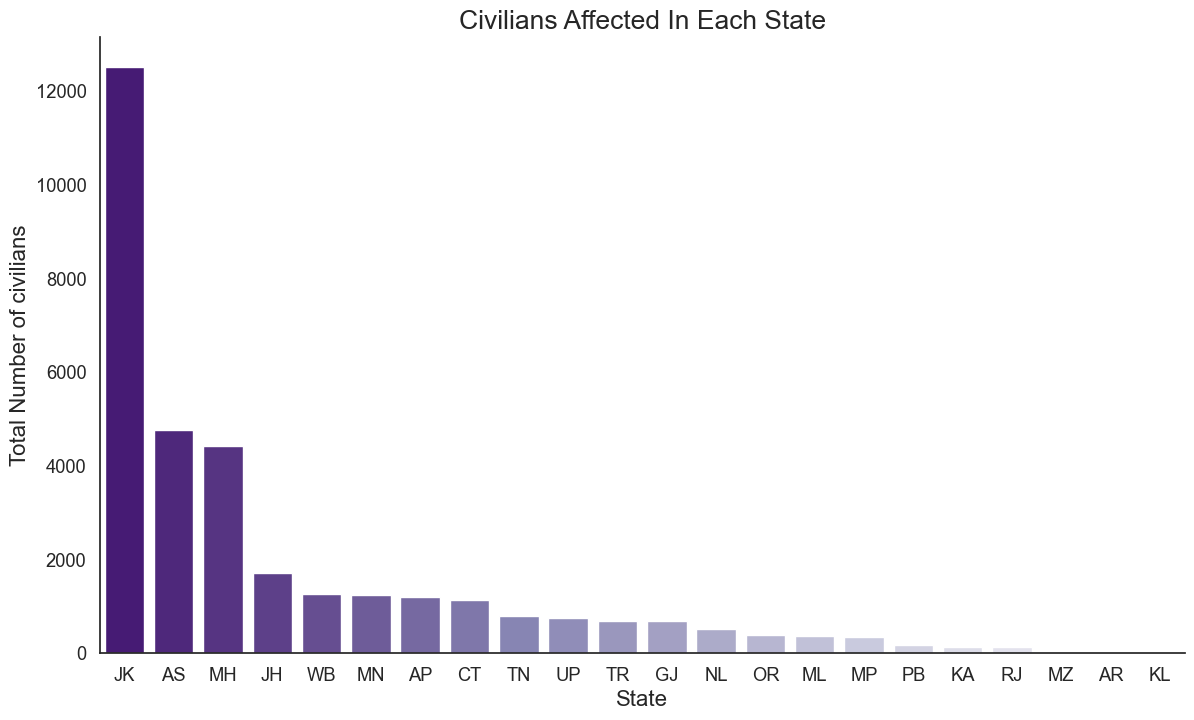

In [144]:
grouped_df = filtered_df2.groupby('state')['civilians'].sum().reset_index()
sorted_df = grouped_df.sort_values('civilians', ascending=False)
custom_palette = sns.color_palette("Purples_r", n_colors=len(sorted_jk_df))

plt.figure(figsize=(14, 8))
sns.barplot(data=sorted_df, x='state', y='civilians', palette=custom_palette)
plt.xlabel('State',fontsize=16)
plt.ylabel('Total Number of civilians',fontsize=16)
plt.title('Civilians Affected In Each State',fontsize=19)

sns.despine()
plt.grid(False)
plt.show()


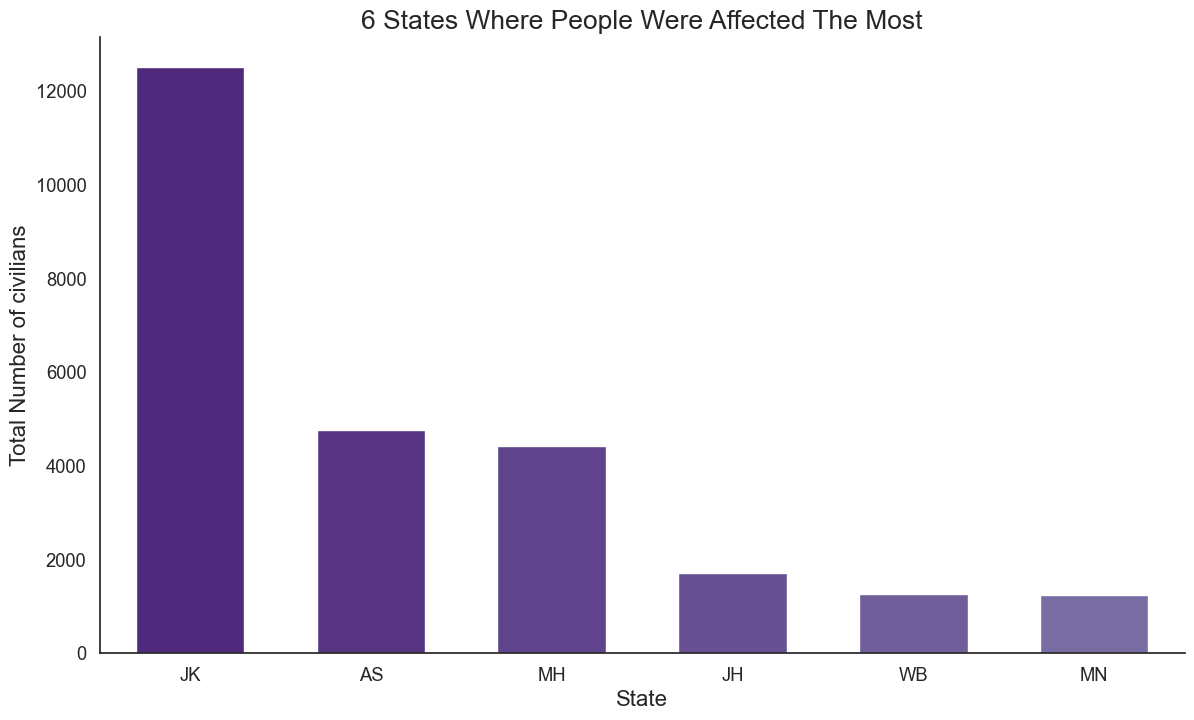

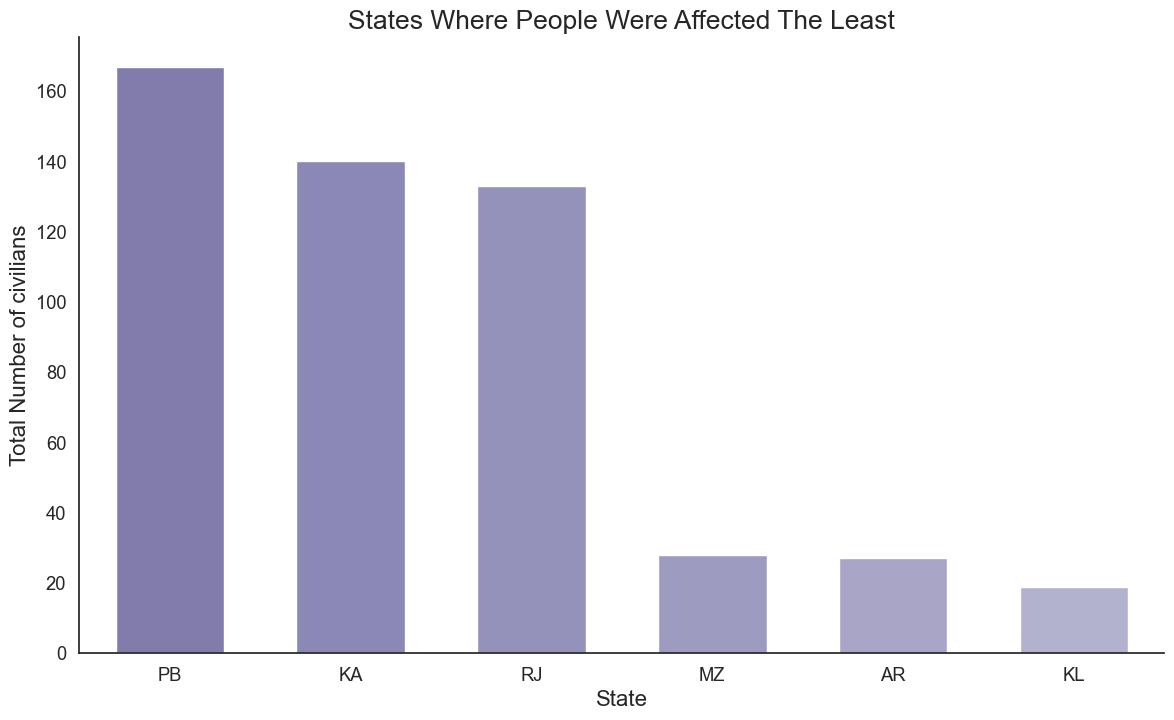

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame and grouping code
grouped_df = filtered_df2.groupby('state')['civilians'].sum().reset_index()
sorted_df = grouped_df.sort_values('civilians', ascending=False)

# Custom color palette
custom_palette = sns.color_palette("Purples_r", n_colors=len(sorted_df))

# Top 6 states plot
top_n = 6
top_df = sorted_df.head(top_n)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_df, x='state', y='civilians', palette=custom_palette[1:top_n + 1], width=0.6)
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of civilians', fontsize=16)
plt.title('6 States Where People Were Affected The Most', fontsize=19)
sns.despine()
plt.grid(False)
plt.show()

# Bottom 6 states plot
bottom_n = 6
bottom_df = sorted_df.tail(bottom_n)
plt.figure(figsize=(14, 8))
sns.barplot(data=bottom_df, x='state', y='civilians', palette=custom_palette[7:13], width=0.6)
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of civilians', fontsize=16)
plt.title('States Where People Were Affected The Least', fontsize=19)
sns.despine()
plt.grid(False)
plt.show()


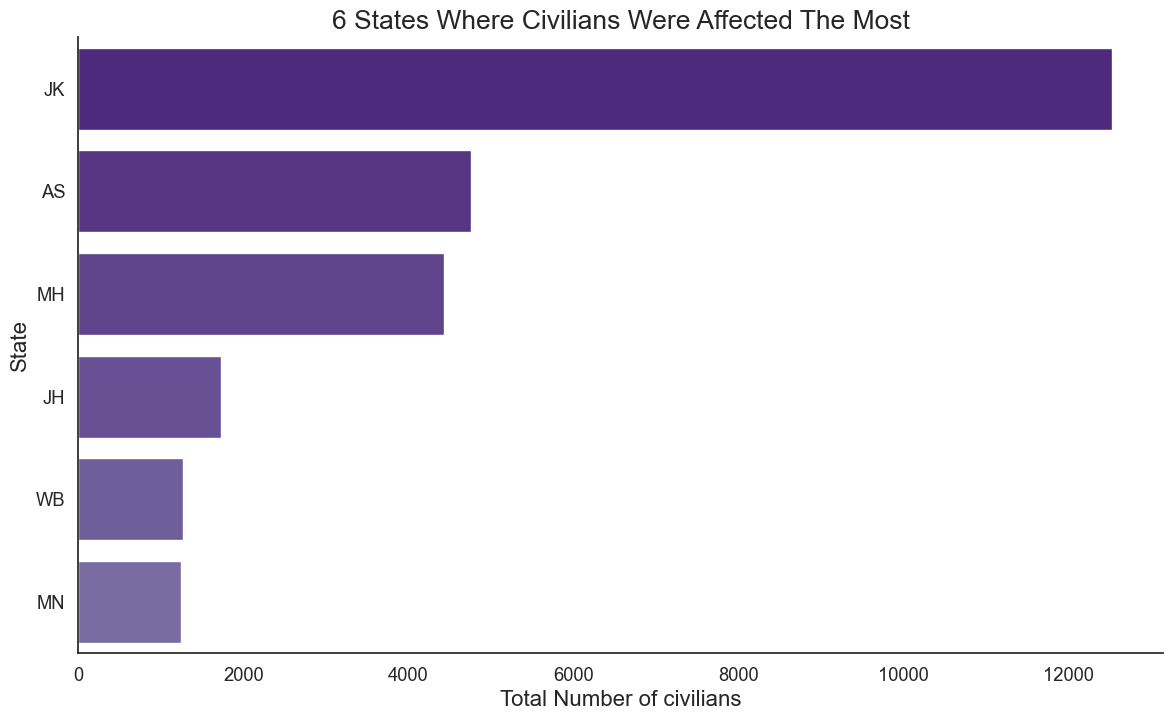

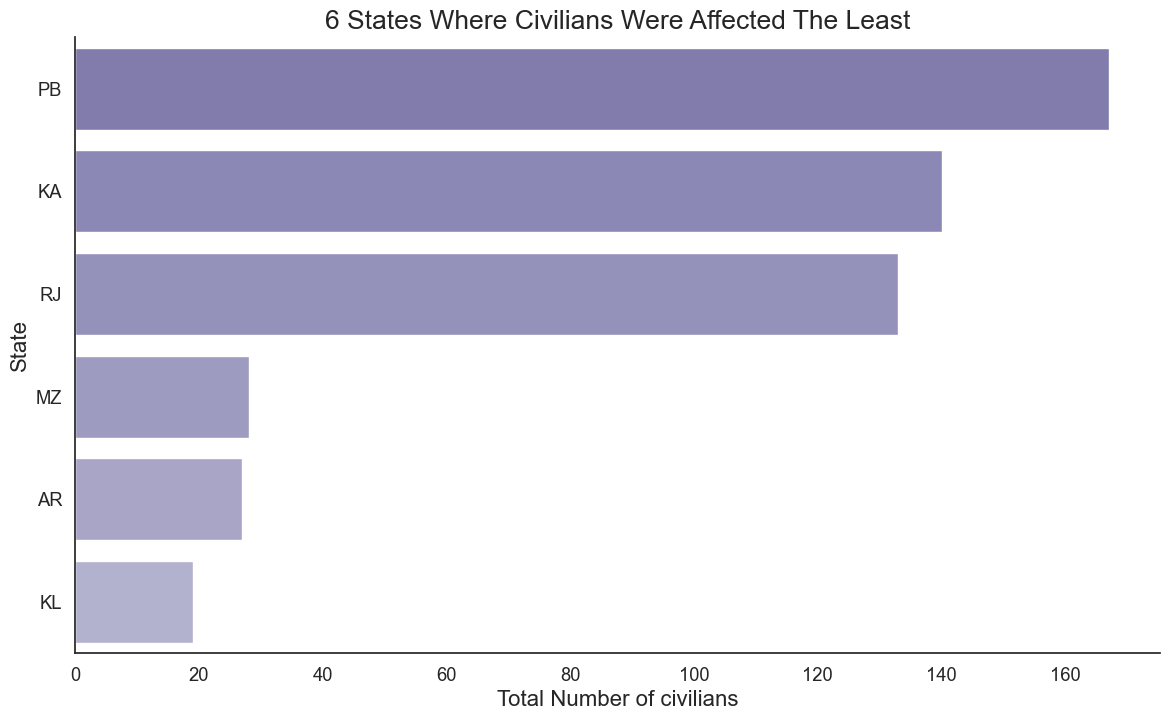

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame and grouping code
grouped_df = filtered_df2.groupby('state')['civilians'].sum().reset_index()
sorted_df = grouped_df.sort_values('civilians', ascending=False)

# Custom color palette
custom_palette = sns.color_palette("Purples_r", n_colors=len(sorted_df))

# Top 6 states plot
top_n = 6
top_df = sorted_df.head(top_n)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_df, y='state', x='civilians', palette=custom_palette[1:top_n + 1], orient='h')
plt.xlabel('Total Number of civilians', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.title('6 States Where Civilians Were Affected The Most', fontsize=19)
sns.despine()
plt.grid(False)
plt.show()

# Bottom 6 states plot
bottom_n = 6
bottom_df = sorted_df.tail(bottom_n)
plt.figure(figsize=(14, 8))
sns.barplot(data=bottom_df, y='state', x='civilians', palette=custom_palette[7:13], orient='h')
plt.xlabel('Total Number of civilians', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.title('6 States Where Civilians Were Affected The Least', fontsize=19)
sns.despine()
plt.grid(False)
plt.show()


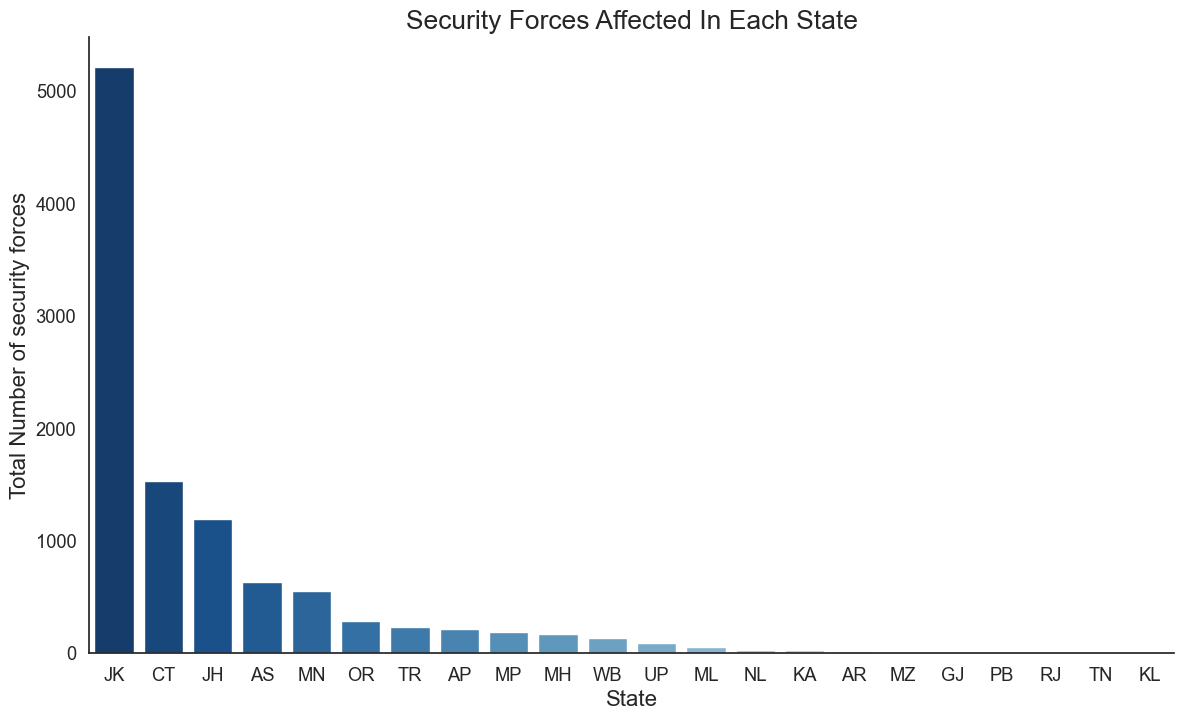

In [147]:
grouped_df = filtered_df2.groupby('state')['security_forces'].sum().reset_index()
sorted_df = grouped_df.sort_values('security_forces', ascending=False)
custom_palette = sns.color_palette("Blues_r", n_colors=len(sorted_jk_df))

plt.figure(figsize=(14, 8))
sns.barplot(data=sorted_df, x='state', y='security_forces', palette=custom_palette)
plt.xlabel('State',fontsize=16)
plt.ylabel('Total Number of security forces',fontsize=16)
plt.title('Security Forces Affected In Each State',fontsize=19)

sns.despine()
plt.grid(False)
plt.show()


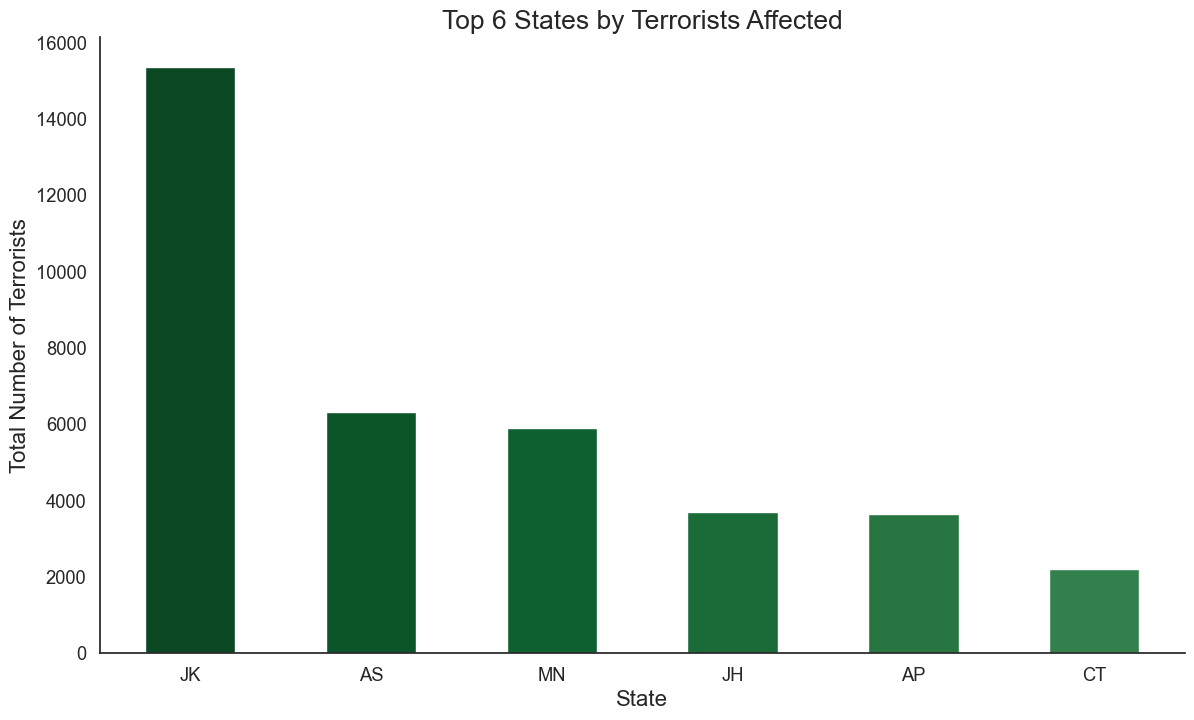

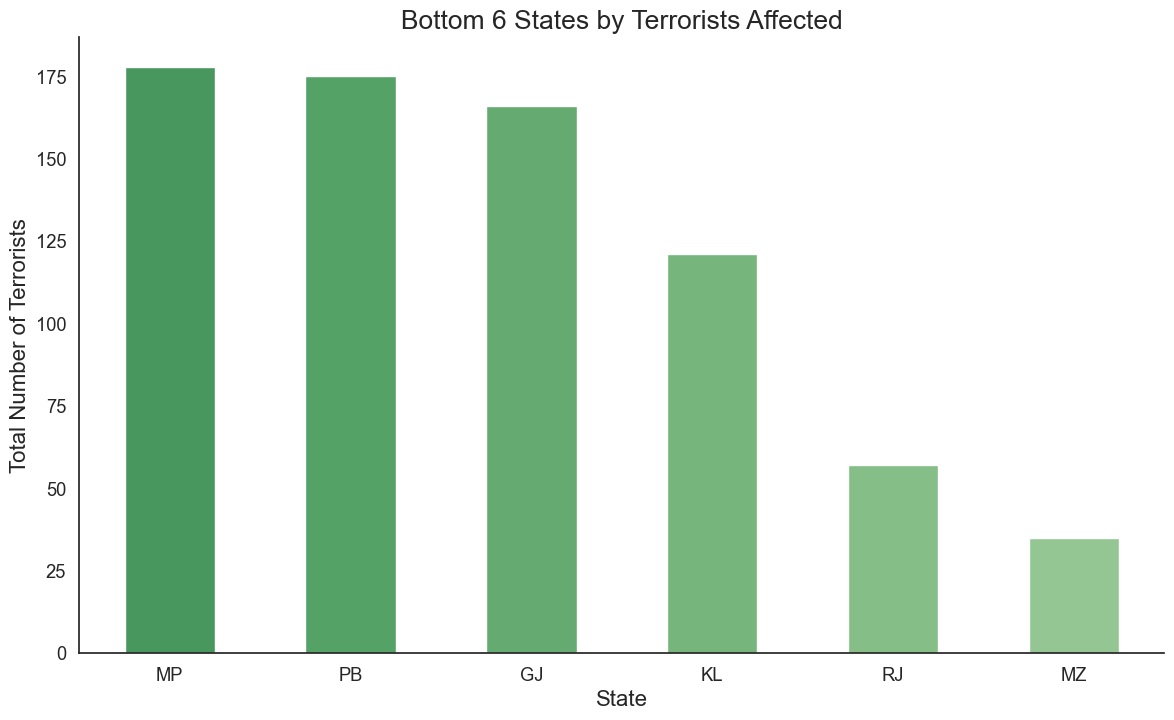

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame and grouping code
grouped_df = filtered_df2.groupby('state')['militants_terrorists_insurgents'].sum().reset_index()
sorted_df = grouped_df.sort_values('militants_terrorists_insurgents', ascending=False)

# Custom color palette
custom_palette = sns.color_palette("Greens_r", n_colors=len(sorted_df))

# Top 6 states plot
top_n = 6
top_df = sorted_df.head(top_n)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_df, x='state', y='militants_terrorists_insurgents', palette=custom_palette[:top_n], width=0.5)
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of Terrorists', fontsize=16)
plt.title('Top {} States by Terrorists Affected'.format(top_n), fontsize=19)
sns.despine()
plt.grid(False)
plt.show()

# Bottom 6 states plot
bottom_n = 6
bottom_df = sorted_df.tail(bottom_n)
plt.figure(figsize=(14, 8))
sns.barplot(data=bottom_df, x='state', y='militants_terrorists_insurgents', palette=custom_palette[7:13], width=0.5)
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of Terrorists', fontsize=16)
plt.title('Bottom {} States by Terrorists Affected'.format(bottom_n), fontsize=19)
sns.despine()
plt.grid(False)
plt.show()


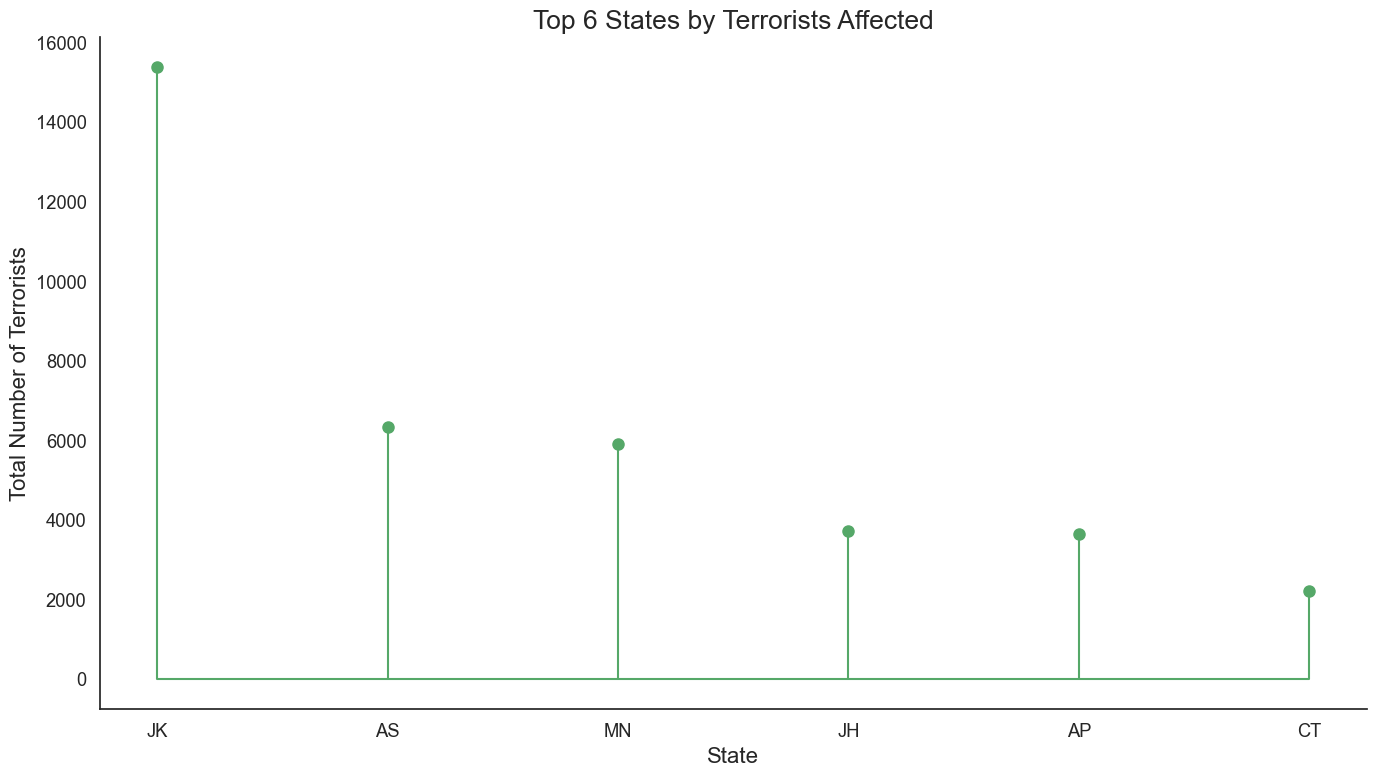

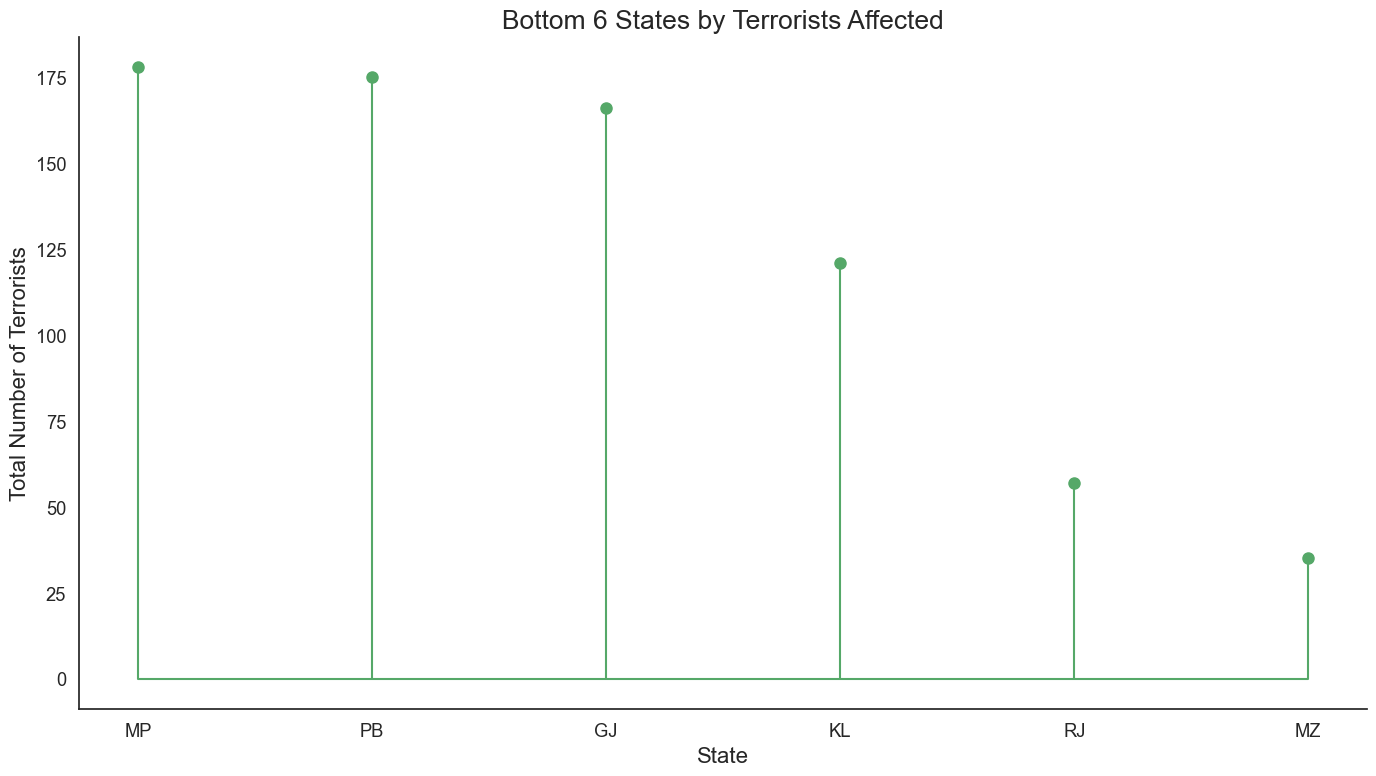

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame and grouping code
grouped_df = filtered_df2.groupby('state')['militants_terrorists_insurgents'].sum().reset_index()
sorted_df = grouped_df.sort_values('militants_terrorists_insurgents', ascending=False)

# Custom color palette
custom_palette = sns.color_palette("Greens_r", n_colors=len(sorted_df))

# Top 6 states plot
top_n = 6
top_df = sorted_df.head(top_n)

plt.figure(figsize=(14, 8))
sns.set(style='white', font_scale=1.2)

# Create evenly spaced indices for lollipop plot
x_indices_top = range(len(top_df))

# Create the vertical lines for the lollipops
plt.stem(x_indices_top, top_df['militants_terrorists_insurgents'], linefmt='g-', markerfmt='go', basefmt='g-')

# Create the markers for the lollipops
plt.plot(x_indices_top, top_df['militants_terrorists_insurgents'], 'go', markersize=8)

plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of Terrorists', fontsize=16)
plt.title('Top {} States by Terrorists Affected'.format(top_n), fontsize=19)
plt.xticks(x_indices_top, top_df['state'])
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()

# Bottom 6 states plot
bottom_n = 6
bottom_df = sorted_df.tail(bottom_n)

plt.figure(figsize=(14, 8))
sns.set(style='white', font_scale=1.2)

# Create evenly spaced indices for lollipop plot
x_indices_bottom = range(len(bottom_df))

# Create the vertical lines for the lollipops
plt.stem(x_indices_bottom, bottom_df['militants_terrorists_insurgents'], linefmt='g-', markerfmt='go', basefmt='g-')

# Create the markers for the lollipops
plt.plot(x_indices_bottom, bottom_df['militants_terrorists_insurgents'], 'go', markersize=8)

plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of Terrorists', fontsize=16)
plt.title('Bottom {} States by Terrorists Affected'.format(bottom_n), fontsize=19)
plt.xticks(x_indices_bottom, bottom_df['state'])
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()


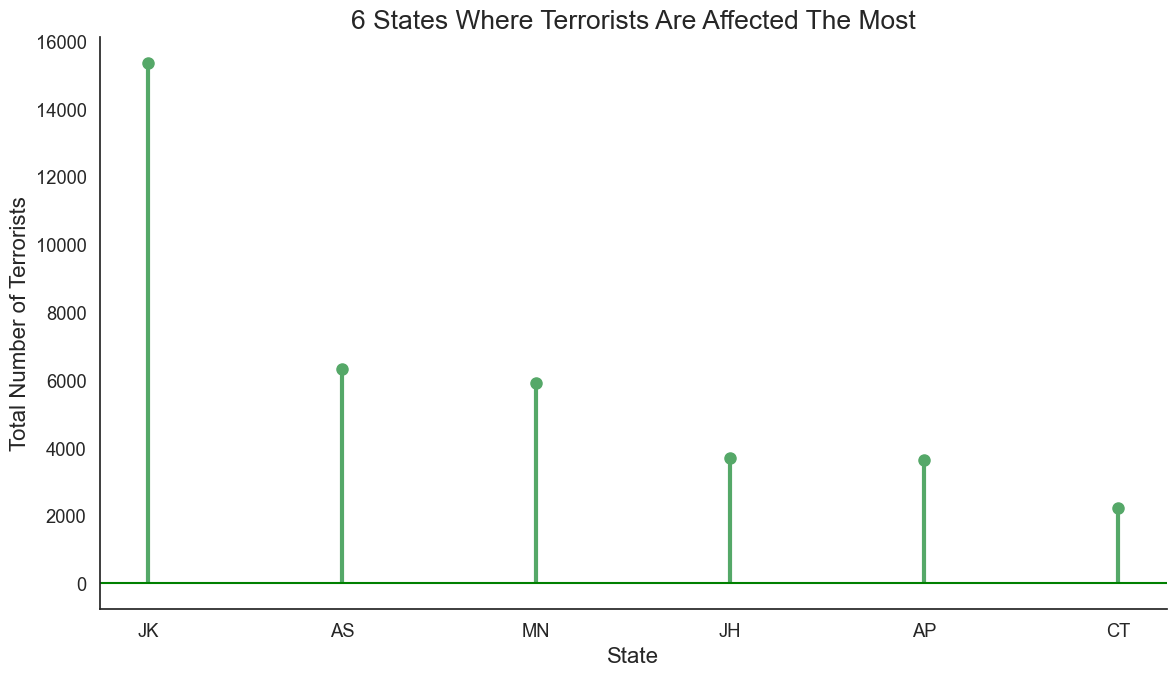

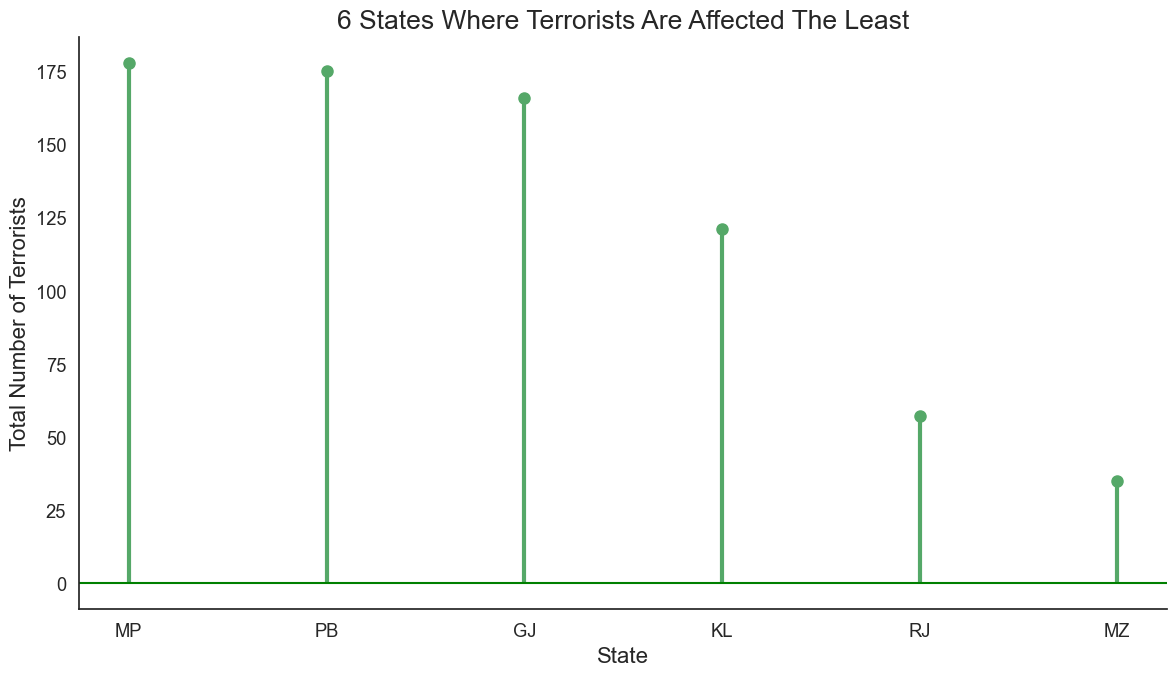

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame and grouping code
grouped_df = filtered_df2.groupby('state')['militants_terrorists_insurgents'].sum().reset_index()
sorted_df = grouped_df.sort_values('militants_terrorists_insurgents', ascending=False)

# Custom color palette
custom_palette = sns.color_palette("Greens_r", n_colors=len(sorted_df))

# Top 6 states plot
top_n = 6
top_df = sorted_df.head(top_n)

plt.figure(figsize=(12, 7))
sns.set(style='white', font_scale=1.2)

# Create evenly spaced indices for lollipop plot
x_indices_top = range(len(top_df))

# Increase the width of lollipops using the linewidth parameter of plt.vlines()
plt.vlines(x_indices_top, ymin=0, ymax=top_df['militants_terrorists_insurgents'], colors='g', linewidth=3)

# Create the markers for the lollipops
plt.plot(x_indices_top, top_df['militants_terrorists_insurgents'], 'go', markersize=8)

# Add the horizontal line at y=0
plt.axhline(y=0, color='green', linestyle='-', linewidth=1.5)

plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of Terrorists', fontsize=16)
plt.title('6 States Where Terrorists Are Affected The Most', fontsize=19)
plt.xticks(x_indices_top, top_df['state'])
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()

# Bottom 6 states plot
bottom_n = 6
bottom_df = sorted_df.tail(bottom_n)

plt.figure(figsize=(12, 7))
sns.set(style='white', font_scale=1.2)

# Create evenly spaced indices for lollipop plot
x_indices_bottom = range(len(bottom_df))

# Increase the width of lollipops using the linewidth parameter of plt.vlines()
plt.vlines(x_indices_bottom, ymin=0, ymax=bottom_df['militants_terrorists_insurgents'], colors='g', linewidth=3)

# Create the markers for the lollipops
plt.plot(x_indices_bottom, bottom_df['militants_terrorists_insurgents'], 'go', markersize=8)

# Add the horizontal line at y=0
plt.axhline(y=0, color='green', linestyle='-', linewidth=1.5)

plt.xlabel('State', fontsize=16)
plt.ylabel('Total Number of Terrorists', fontsize=16)
plt.title('6 States Where Terrorists Are Affected The Least', fontsize=19)
plt.xticks(x_indices_bottom, bottom_df['state'])
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()


In [151]:
# from tabulate import tabulate

# data = {
#     'Group': ['Civilians', 'Security Forces', 'Terrorists'],
#     'State 1': ['Jammu & Kashmir', 'Jammu & Kashmir', 'Jammu & Kashmir'],
#     'State 2': ['Assam','Chhattisgarh','Assam'],
#     'State 3': ['Maharashtra', 'Jharkhand', 'Manipur']
# }

# table_df = pd.DataFrame(data)

# table_heading = "Top 3 states where each group is affected the most"

# table_str = tabulate(table_df, headers='keys', tablefmt='grid', showindex=False, numalign='center', stralign='center')

# table_str_with_heading = f"{table_heading}\n\n{table_str}"

# print(table_str_with_heading)


In [152]:
# grouped_df = filtered_df2.groupby(['state', 'verb']).size().unstack()
# grouped_df['Total'] = grouped_df.sum(axis=1)

# sorted_df = grouped_df.sort_values('Total', ascending=False)
# sorted_df = sorted_df.drop('Total', axis=1)

# desired_sequence = ['arrested', 'surrendered', 'injured', 'killed']
# sorted_df = sorted_df.reindex(columns=desired_sequence)
# sns.set(style='whitegrid', font_scale=1.2, rc={'grid.linewidth': 0})

# colors = ['#C0C0C0', '#808080', '#007ACC', '#005A8B']  # Light gray, Dark gray, Light blue, Dark blue

# fig, ax = plt.subplots(figsize=(12,8))
# sorted_df.plot(kind='barh', stacked=True, ax=ax, color=colors)

# ax.set_xlabel('Count')
# ax.set_ylabel('State')
# ax.set_title('People affected differently in each state')
# plt.show()

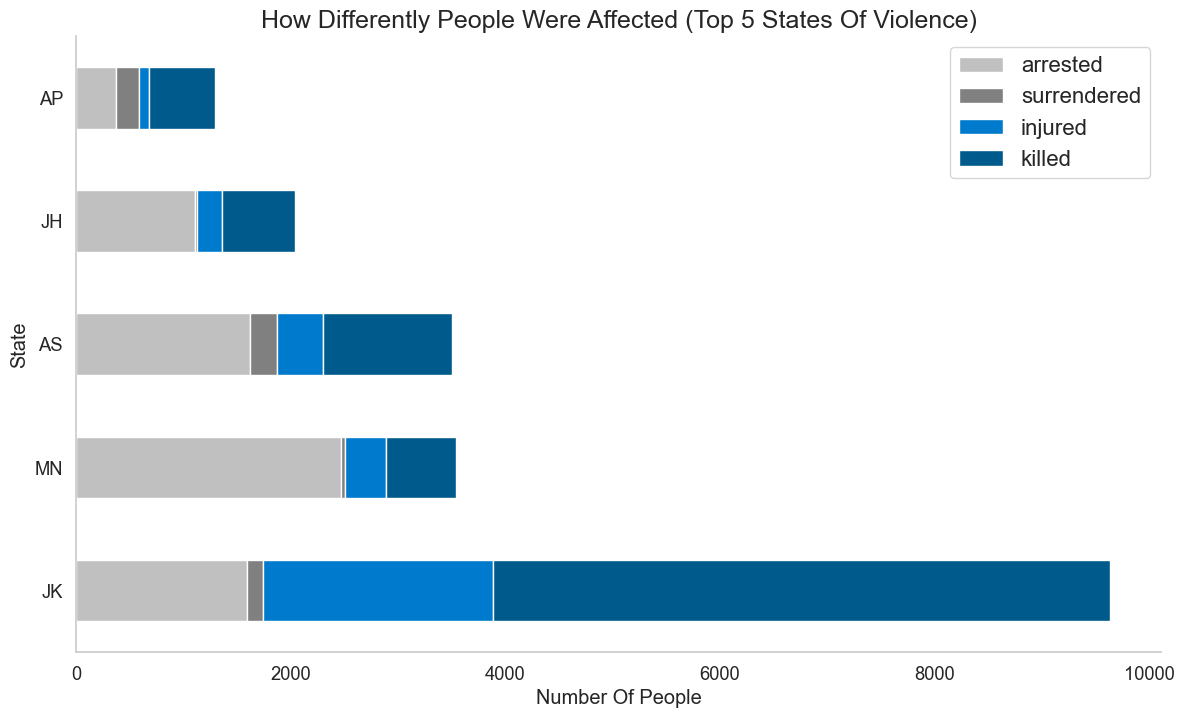

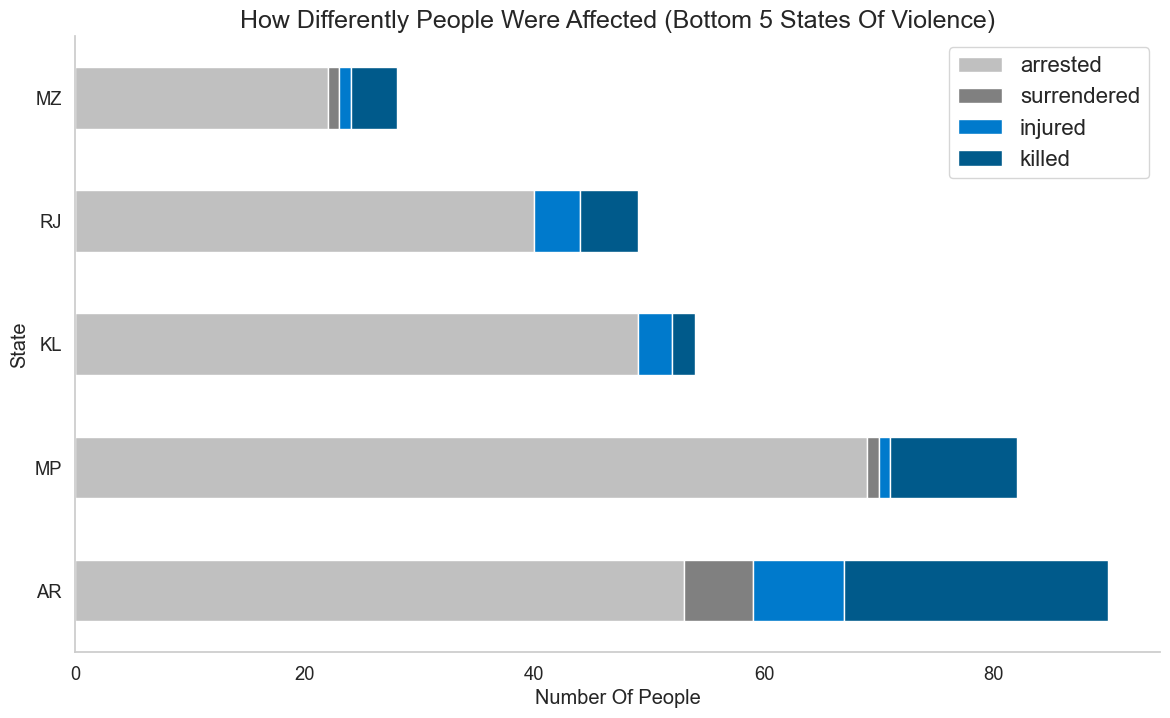

In [153]:
grouped_df = filtered_df2.groupby(['state', 'verb']).size().unstack()
grouped_df['Total'] = grouped_df.sum(axis=1)

sorted_df = grouped_df.sort_values('Total', ascending=False)
sorted_df = sorted_df.drop('Total', axis=1)

desired_sequence = ['arrested', 'surrendered', 'injured', 'killed']
sorted_df = sorted_df.reindex(columns=desired_sequence)

top_five_states = sorted_df.head(5)
bottom_five_states = sorted_df.tail(5)

colors = ['#C0C0C0', '#808080', '#007ACC', '#005A8B']
# Plot the top 5 states
sns.set(style='whitegrid', font_scale=1.2, rc={'grid.linewidth': 0})
fig, ax = plt.subplots(figsize=(14, 8))
top_five_states.plot(kind='barh', stacked=True, ax=ax, color=colors)
ax.set_xlabel('Number Of People')
ax.set_ylabel('State')
ax.set_title('How Differently People Were Affected (Top 5 States Of Violence)',fontsize=18)
plt.legend(fontsize=16)
sns.despine()
plt.show()

# Plot the bottom 5 states
sns.set(style='whitegrid', font_scale=1.2, rc={'grid.linewidth': 0})
fig, ax = plt.subplots(figsize=(14, 8))
bottom_five_states.plot(kind='barh', stacked=True, ax=ax, color=colors)
ax.set_xlabel('Number Of People')
ax.set_ylabel('State')
ax.set_title('How Differently People Were Affected (Bottom 5 States Of Violence)',fontsize=18)
plt.legend(fontsize=16)
sns.despine()
plt.show()

In [154]:
filtered_df2.svmlabel1.unique()

array(['security', 'terrorist', 'civilian'], dtype=object)

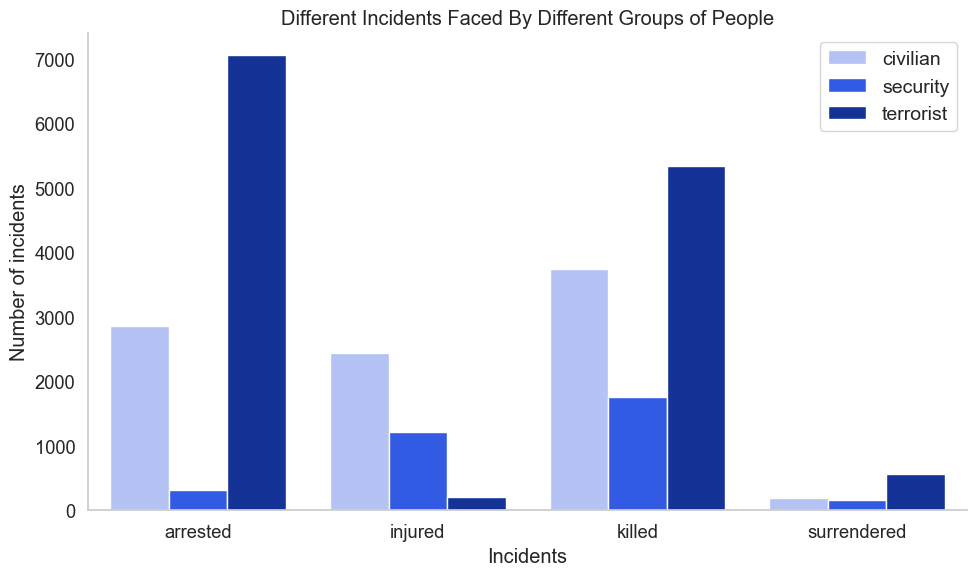

In [155]:
grouped_df = filtered_df2.groupby(["verb", "svmlabel1"]).size().unstack(fill_value=0)

# Reset the index to convert "verb" back to a column for plotting
grouped_df = grouped_df.reset_index()

# Melt the DataFrame to convert columns to categorical variables
melted_df = pd.melt(grouped_df, id_vars=["verb"], value_vars=["civilian", "security", "terrorist"])

# Custom colors for the plot
custom_colors = ["#a9bcff", "#164aff", "#0026ab"]

# Plotting the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="verb", y="value", hue="svmlabel1", data=melted_df, palette=custom_colors)

sns.despine()
plt.xlabel("Incidents")
plt.ylabel("Number of incidents")
plt.title("Different Incidents Faced By Different Groups of People")
plt.legend(fontsize=14)

plt.grid(False)
plt.tight_layout()
plt.show()


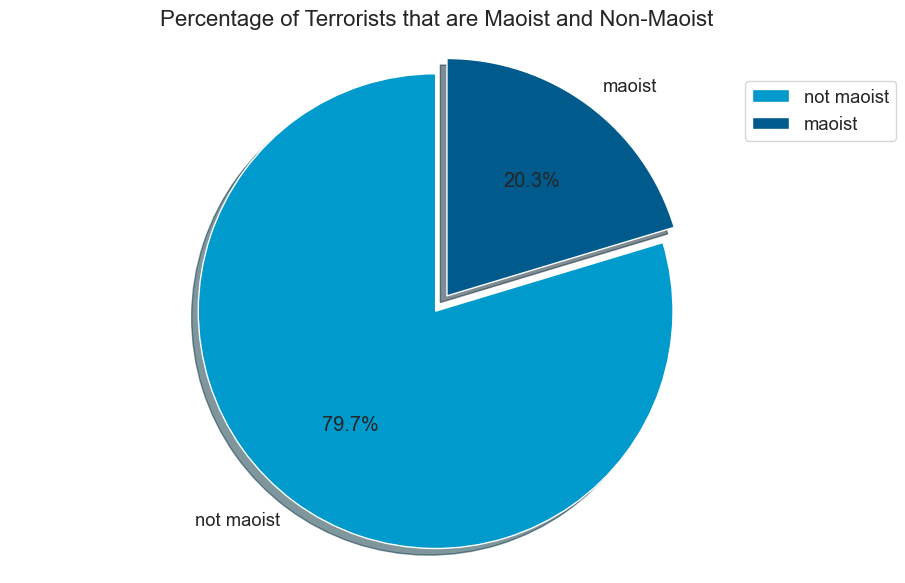

In [156]:
terrorist_df = filtered_df2[filtered_df2['svmlabel1'] == 'terrorist']

grouped_df = terrorist_df['svmlabel2'].value_counts()

# plt.figure(facecolor='#D3D3D3' ,figsize=(11, 7))
plt.figure(figsize=(11, 7))


colors = ['#009ACC', '#005A8B']
# colors = ['#FF42A5F5', '#005A8B']

plt.pie(grouped_df, labels=grouped_df.index, autopct='%1.1f%%', colors=colors, explode=[0.08,0], shadow=True, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Percentage of Terrorists that are Maoist and Non-Maoist', fontsize=16)
plt.legend(grouped_df.index, loc='best', bbox_to_anchor=(1.05, 0.93))

plt.axis('equal')
plt.show()

In [157]:
# terr_df = filtered_df2[filtered_df2['svmlabel1'] == 'terrorist']
# grouped_df = terr_df.groupby(['verb', 'svmlabel2']).size().reset_index(name='Count')

# plt.figure(figsize=(10, 6))
# sns.set(style='white', font_scale=1.2)  

# colors = ['#C0C0C0', '#007ACC']

# ax = sns.barplot(data=grouped_df, x='verb', y='Count', hue='svmlabel2', palette=colors, edgecolor='black', order=['arrested', 'surrendered', 'injured', 'killed'])

# # Set the labels and title
# ax.set_xlabel('Verb',fontsize=16)
# ax.set_ylabel('Count',fontsize=16)
# ax.set_title('What happened to different group of terrorists',fontsize=19)

# sns.despine()

# plt.legend(title='SVMLabel2', loc='upper right', bbox_to_anchor=(1.24, 1.05))
# plt.show()


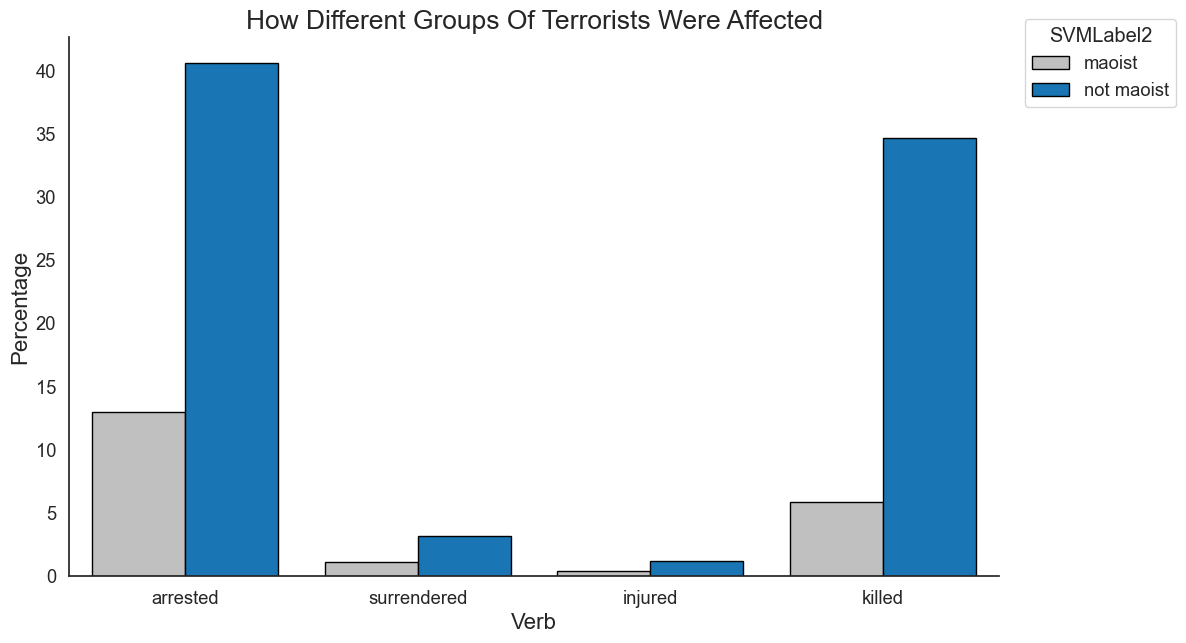

In [161]:
terr_df = filtered_df2[filtered_df2['svmlabel1'] == 'terrorist']

# Group data by 'verb' and 'svmlabel2' and calculate occurrences
grouped_df = terr_df.groupby(['verb', 'svmlabel2']).size().reset_index(name='Count')

# Calculate the total count for each 'verb' category
total_counts = grouped_df.groupby('verb')['Count'].sum()

# Calculate the percentage for each incident within each 'verb' category
grouped_df['Percentage'] = grouped_df.apply(lambda row: (row['Count'] / total_counts.sum() * 100), axis=1)

plt.figure(figsize=(12, 7))
sns.set(style='white', font_scale=1.2)  

colors = ['#C0C0C0', '#007ACC']

ax = sns.barplot(data=grouped_df, x='verb', y='Percentage', hue='svmlabel2', palette=colors, edgecolor='black', order=['arrested', 'surrendered', 'injured', 'killed'])

# Set the labels and title
ax.set_xlabel('Verb', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('How Different Groups Of Terrorists Were Affected', fontsize=19)

sns.despine()

plt.legend(title='SVMLabel2', loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.show()

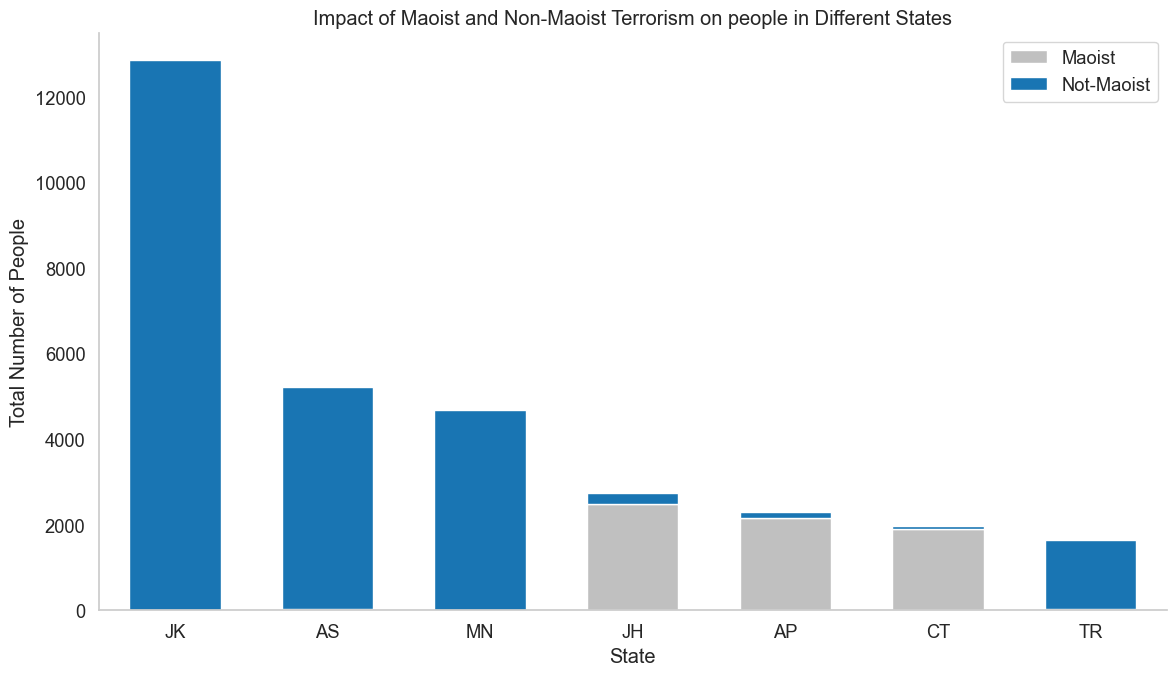

In [159]:
terrorist_df = filtered_df2[filtered_df2['svmlabel1'] == 'terrorist']

pivot_table = terrorist_df.pivot_table(index='state', columns='svmlabel2', values='total_number_of_people', aggfunc='sum', fill_value=0)

# Sort the states based on the total number of people affected by Maoist terrorists
pivot_table['total'] = pivot_table['maoist'] + pivot_table['not maoist']

# Sort the states based on the total number of people affected (descending order)
sorted_states = pivot_table['total'].sort_values(ascending=False).index

# Get the top 7 states based on the total number of people affected
top_7_states = sorted_states[:7]

# Filter the pivot table to include only the top 7 states
pivot_table_top_7 = pivot_table.loc[top_7_states]

# Plotting the stacked bar plot
plt.figure(figsize=(12, 7))
sns.set(style='whitegrid', font_scale=1.2)
colors = ['#C0C0C0', '#007ACC']

# Use stacked barplot to show 'Maoist' and 'Non-Maoist' side by side for each state
ax = sns.barplot(data=pivot_table_top_7, x=pivot_table_top_7.index, y='maoist', color=colors[0], label='Maoist', width=0.6)
sns.barplot(data=pivot_table_top_7, x=pivot_table_top_7.index, y='not maoist', color=colors[1], label='Not-Maoist', bottom=pivot_table_top_7['maoist'], width=0.6)

ax.set_xlabel('State')
ax.set_ylabel('Total Number of People')
ax.set_title('Impact of Maoist and Non-Maoist Terrorism on people in Different States')

# plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
sns.despine()
plt.grid(False)

plt.tight_layout()
plt.show()


In [160]:
# terrorist_df = filtered_df2[filtered_df2['svmlabel1'] == 'terrorist']

# pivot_table = terrorist_df.pivot_table(index='state', columns='svmlabel2', values='militants_terrorists_insurgents', aggfunc='sum', fill_value=0)

# # Sort the states based on the total number of people affected by Maoist terrorists
# pivot_table['total'] = pivot_table['maoist'] + pivot_table['not maoist']

# # Sort the states based on the total number of people affected (descending order)
# sorted_states = pivot_table['total'].sort_values(ascending=False).index

# # Get the top 7 states based on the total number of people affected
# top_7_states = sorted_states[:7]

# # Filter the pivot table to include only the top 7 states
# pivot_table_top_7 = pivot_table.loc[top_7_states]

# # Plotting the stacked bar plot
# plt.figure(figsize=(12, 7))
# sns.set(style='whitegrid', font_scale=1.2)
# colors = ['#C0C0C0', '#007ACC']

# # Use stacked barplot to show 'Maoist' and 'Non-Maoist' side by side for each state
# ax = sns.barplot(data=pivot_table_top_7, x=pivot_table_top_7.index, y='maoist', color=colors[0], label='Maoist', width=0.6)
# sns.barplot(data=pivot_table_top_7, x=pivot_table_top_7.index, y='not maoist', color=colors[1], label='Non-Maoist', bottom=pivot_table_top_7['maoist'], width=0.6)

# ax.set_xlabel('State')
# ax.set_ylabel('Total Number of People Affected')
# ax.set_title('Total Number of People Affected by Maoist and Non-Maoist Terrorists in Each State (Top 7 States)')

# # plt.xticks(rotation=45, ha='right')
# plt.legend(title='SVMLabel2', loc='upper right')
# sns.despine()
# plt.grid(False)

# plt.tight_layout()
# plt.show()
